
<h1 align=center style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
</font>
</h1>
<h2 align=center style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  پروژه 3 یادگیری تقویتی
</font>
</h2>
<h2 align=right style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  نام: سحر آقاخانی
</font>
</h2>
<h2 align=right style="line-height:200%;font-family:vazir;color:#000000">
<font face="vazir" color="#000000">
  شماره دانشجویی: -
</font>
</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.table as tbl
from IPython.display import clear_output
from tqdm import tqdm


np.random.seed(42)


In [2]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 1: تعریف محیط
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این کلاس، محیط مسابقه و ویژگی‌های آن تعریف شده است. با توجه به جزدیات مساله، این محیط شامل یک جدول است که نقاط مربوط به خط شروع آن با <code>'S'</code>، نقاط مربوط به خط پایان آن با <code>'F'</code>، دیواره های جدول با <code>'W'</code> و نقاطی که خودرو میتواند در آن ها حرکت کند با <code>'.'</code>، نمایش داده شده است.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حالت هایی که برای این محیط و عامل (ماشین مسابقه) در آن تعریف شده است به صورت <code>(j,i,Vi,Vj)</code>است. این حالت ها به ترتیب  مختصات عمودی، مختصات افقی، سرعت افقی و سرعت عمودی خودرو هستند.
برای این محیط، چندین تابع تعریف شده است. این توابع به شرح زیر هستند:
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>start_state()</code>:این تابع یکی از نقاط شروع را به صورت رندوم انتخاب کرده و استیت متناظر با آن (با سرعت 0) را به عنوان خروجی باز میگرداند.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>is_goal(state)</code>:
این تابع با گرفتن یک استیت مشخص می کند که آیا عامل از خط پایان رد شده است یا خیر. نحوه تعریف این تابع به این صورت است که فرض می شود که دیواره ها پس از خط پایان به همان شکل ادامه دارد و چک می کند که آیا استیت ورودی تابع شرایط عبور از خط پایان را دارد یا خیر.

</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>is_out(state)</code>:
این تابع برای هر استیت ورودی چک میکند که آیا آن استیت خارج از مسیر مسابقه است یا خیر. به این شکل که ابتدا چک میشود که استیت داخل جدول مسیر باشد، و سپس چک می شود که خانه ای که عامل بر روی آن قرار دارد دیوار نباشد.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>next_state(state, action)</code>: این تابع با گرفتن استیت ورودی <code>(j,i,Vi,Vj)</code> و یک عمل<code>(dVi, dVj)</code> استیت بعدی و پاداش ناشی از آن را خروجی می دهد. این تابع ابتدا استیت جدید به دست آمده را محاسبه کرده و در صورتی که استیت جدید خارج از صفحه مسابقه باشد و استیت هدف نباشد، استیت جدید را به یکی از نقاط شروع به صورت رندوم تغییر میدهد. و پاداش -5 را بازمیگرداند. در غیر این صورت، پاداش -1 و استیت جدید را باز میگرداند.
</font>
</p>

In [3]:
class RaceGrid:
  def __init__(self):

    self.grid = np.full((32,17),'.')
    self.grid[31,3:9]='S'
    self.grid[0:5,16]='F'
    # self.grid[:,17:22] = 'F'
    self.grid[5:,10:] ='W'
    self.grid[6:,9] ='W'
    self.grid[:4,0] ='W'
    self.grid[:3,1] ='W'
    self.grid[0,2] ='W'
    self.grid[14:,0] ='W'
    self.grid[22:,1]='W'
    self.grid[29:,2]  ='W'
    # self.state = self.start_state()

  def start_state(self):
    state = (31 , np.random.randint(3,9), 0,0); #( j, i , Vi , Vj)
    return state



  def is_goal(self, state):
    j , i ,Vi ,Vj = state
    if (i>=16 and j<6 and j>=0):
      return 1
    else:
      return 0



  def is_out(self, state):
    if (state[0]>31) or (state[0]<0) or (state[1]>=17) or (state[1]<0):
      return 1
    elif (self.grid[state[0],state[1]] == 'W'):
      return 1
    else:
      return 0

  def next_state(self , state , action):
    # action should be a tuple (dVi , dVj)
    reward = -1
    new_state = (state[0]-state[3] - action[1] , state[1]+state[2]+action[0] , state[2]+ action[0], state[3]+ action[1])
    if ((self.is_out(new_state)) and (not self.is_goal(new_state))):
      reward = -5
      new_state = self.start_state()

    return (new_state , reward)







# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 2: تعریف عامل
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این کلاس، عامل ( ماشین مسابقه) و همچنین پارامتر های مربوط به آن تعریف شده اند.پارامتر های عامل عبارتند از:
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>grid</code>: این پارامتر یک کپی از کلاس RaceGrid است که محیط را برای عامل تعریف میکند.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>actions</code>: این پارامتر یک لیست از تمام اکشن های قابل انجام در یک گام زمانی است که شامل کم یا زیاد شدن سرعت به اندازه یک واحد در یک یا هر دو جهت می شود. این لیست عبارت است از:<code>[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]</code>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>velocities</code>: این پارامتر شامل همه سرعت های قابل قبول برای عامل است. این سرعت ها شامل سرعت عامل در نقطه شروع هم می شود.
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>policy</code>: این متغیر آرایه ای از لیست است که به ازای هر حالت (j,i,velocity_number) عمل یا عمل های بهینه که از روی تابع ارزش حالت و عمل به صورت حریصانه به دست آمده است، به صورت شماره اندیس آن عمل ( در لیست <code>actions</code>) را به ازای هر خانه از گرید در آن ذخیره می شود.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>last_policy</code>: این متغیر جهت ذخیره سازی سیاست مرحله قبل و برای چککردن همگرایی سیاست ها تعریف شده است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>actionvalue_fcn</code>: <code>این متغیر یک آرایه است که به ازای هر حالت (j,i,Vi,vj)</code> و عمل <code>(dVi,dVj)</code>  ارزش آن ذخیره میکند. در ابتدا به همه حالت ها ارزش صفر داده شده است و همه خانه هایی که خارج از گرید هستند ارزش آن ها <code>np.nan</code>  قرار داده شده است. شماره گذاری این حالت عمل ها برای سادگی بر اساس اندیس موجود در دو متغیر <code>actions</code> و <code>velocities</code>  است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>num_visited</code>: این تابع برای شمارش تعداد دفعات ملاقات هر حالت - عمل برای پیاده سازی الگوریتم مونت کارلو every visit تعریف شده است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
علاوه بر متغیر های معرفی شده، برای پیاده سازی الگوریتم یادگیری تقویتی مونت کارلو، توابع زیر تعریف شده اند:
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>action_is_valid (state, action)</code>: این تابع چک میکند که عمل action در حالت state مجاز هست یا خیر (آیا محدوده سرعت های افقی و عمودی را رعایت می کند یا نه)
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>greedy_actions(state)</code>: این تابع بر اساس مقدار ارزش حالت عمل هر خانه از مسیر، یک لیست از شماره اندیس عمل های مجاز حریصانه ( با بیشترین مقدار حالت عمل) را باز میگرداند. شماره هر عمل بر اساس اندیس آن در لیست <code>self.actions</code>  است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>non_greedy_actions(state)</code>: این تابع لیستی از عمل های مجاز غیر حریصانه را باز میگرداند. شماره این عمل ها مانند تابع <code>greedy_actions(state)</code> شماره گذاری شده است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>Egreedy_action_chooser( state , epsilon )</code>: این تابع بر اساس سیاست شبه حریصانه، عمل بهینه را در هر مرحله انتخاب کرده و اندیس آن عمل را به صورت خروجی می دهد. این تابه عدد اپسیلون را به عنوان ورودی میگیرد و یک عدد رندوم بین صفر و یک انتخاب کرده و اگر آن عدد از اپسیلون کوچکتر باشد یکی از عمل های غیر حریصانه و اگر بزرگتر باشد یکی از عمل های حریصانه را به عنوان عمل مورد نظر انتخاب میکند.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>episode_generator(epsilon, print_log )</code>: این تابع یک اپیزود را برای عامل تولید کرده. شروع این اپیزود از یکی از نقاط شروع به صورت رندوم است و این اپیزود تا زمانی که عامل به خط پایان برسد و یا آن را رد کند ادامه دارد. خروجی این تابع یک لیست شامل تاپل های <code> (state,action,reward)</code> درهر قدم است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>update_values(episode,discount_factor)</code>: این تابع کع بخش اصلی الگوریتم مونت کارلو است، مقدار تابع ارزش حالت عمل را  با استفاده از الگوریتم every visit MC به دست می آورد. فرمول محاسبه آن مشابه رابطه 28 برای ارزش حالت است و به ازای هر حالت - عمل دیده شده در هر قدم از اپیزود ها، مقدار میانگین پاداش ناشی از آن حالت عمل، با استفاده از رابطه 29 محاسبه شده است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>train( episode_counts,epsilon_start, epsilon_min, decay_rate)</code>: این تابع در حقیقت با استفاده از توابع دیگر این کلاس،اپیزودها را به صورت کامل تا زمانی که سیاست ها همگرا شود یا تعداد اپیزودها ازتعداد مشخصی بیشتر شود تولید کرده و مقادیر تابع ارزش حالت - عمل و سیاست را آپدیت می کند. عملکرد این تابع به این صورت است که ابتدا سیاست بهینه را به صورت حریصانه به دست می آورد، سپس یک اپیزود تولید کرده و مقادیر تابع ارزش حالت عمل را با توجه به آن اپیزود آپدیت میکند. همچنین این تابع پس از هر 200 اپیزود، همگرایی سیاست را چک میکند و در صورت همگرایی ( برابر شدن سیاست فعلی و قبلی مربوط به 200 اپیزود قبل) دیگر اپیزود جدیدی تولید نمیکند و فرآیند آموزش مدل را قطع میکند. همچنین برای همگرایی سریع تر، این تابع مقدار اپسیلون را به صورت نمایی مشابه فرمول scheduling  در keras کاهش می دهد. همچنین این کلاس برای دنبال کردن راحت تر وضعیت اپیزود ها، سیر تولید اپیزودها را بر روی یک progress bar نمایش می دهد.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>derive_policy ()</code>
این تابع، با استفاده از الگوریتم انتخاب حریصانه، اندیس بهترین عمل ها را بر اساس مقدار تابع ارزش حالت- عمل انتخاب کرده و در متغیر <code>self.policy</code> ذخیره میکند.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>check_policy_convergence()</code>: این تابع دو سیاست <code> self.policy</code> و <code>self.last_policy</code> را با هم مقایسه کرده و اگر دو سیاست یکسان نباشند، سیاست فعلی را ذخیره میکند تا با سیاست بعدی مقایسه کند.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>policy_per_start(start_state, print_log, print_count)</code>: این تابع برای پیدا کردن سیاست بهینه با شروع از هر یک از نقاط شروع ( و نه به صورت رندوم) است و اساس کار آن مشابه تابع <code> self.episode_generator</code>  است. این تابع علاوه بر نوشتن قدم های اپیزودها، تعداد قدم های هر اپیزود با شروع از هر یک از نقاط خط شروع را می نویسد.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>draw_episode(episode)</code>: این تابع به ازای هر اپیزود ورودی، قدم های آن اپیزود را در جدول مسابقه به علاوه سرعت و شتاب عامل در هر قدم بر روی یک جدول رسم میکند.
</font>
</p>


In [4]:
class RaceCar:
  def __init__(self,RaceGrid):
    self.grid = RaceGrid
    self.actions = [(i,j)for i in range(-1,2,1) for j in range(-1,2,1)] #action space
    self.velocities = [(Vi , Vj) for Vi in range(-5,6) for Vj in range(6)]   # velocity part of the states

    self.policy = np.zeros((self.grid.grid.shape[0],self.grid.grid.shape[1], len(self.velocities)), dtype = object)
    self.last_policy = np.zeros_like(self.policy)

    self.actionvalue_fcn =np.zeros((self.grid.grid.shape[0],self.grid.grid.shape[1], len(self.velocities), len(self.actions)))
    self.num_visited = np.zeros_like(self.actionvalue_fcn)
    for j in range(self.grid.grid.shape[0]):
      for i in range(self.grid.grid.shape[1]):
        for velocity_id, (Vi,Vj) in enumerate(self.velocities):
          state = (j,i,Vi,Vj)
          if self.grid.is_out(state):
            self.policy[j,i, velocity_id] = np.nan
            self.actionvalue_fcn[j,i,velocity_id,:]=np.nan


          for action_id , action in enumerate(self.actions):
            if not self.action_is_valid(state,action) :
              self.actionvalue_fcn[j,i,velocity_id,action_id] = np.nan

  def action_is_valid (self,state, action):
    Vi_new = state[2]+ action[0]
    Vj_new = state[3] + action[1]
    if (Vj_new > 0) and( Vi_new<5) and (Vi_new>-5) and (Vj_new <5):
      return 1
    else:
      return 0


  def greedy_actions(self, state):
    j, i, V_i, V_j = state
    velocity_id = self.velocities.index((V_i, V_j))
    q_values = self.actionvalue_fcn[j, i, velocity_id, :]
    if np.all(np.isnan(q_values)):
      return []
    max_value = np.nanmax(q_values)
    best_action_ids = np.where(q_values == max_value)[0]
    return best_action_ids

  def non_greedy_actions(self,state):
    j, i, V_i, V_j = state
    velocity_id = self.velocities.index((V_i, V_j))
    q_values = self.actionvalue_fcn[j, i, velocity_id, :]
    max_value = np.nanmax(q_values)
    bad_action_ids = np.array([idx for idx , q in enumerate(q_values) if (q!= max_value and (not np.isnan(q)))])

    return bad_action_ids


  def Egreedy_action_chooser(self, state , epsilon = 0.1):

    random = np.random.uniform(low = 0.0, high= 1.0)
    if random <=epsilon:
      bad_action_ids = self.non_greedy_actions(state)
      if bad_action_ids.size>0:
          action_idx = np.random.choice(bad_action_ids)
      else:
          action_idx = np.random.choice(self.greedy_actions(state))
    else:
      action_idx = np.random.choice(self.greedy_actions(state))

    return action_idx

  def episode_generator(self, epsilon= 0.1, print_log = False):
    episode_steps = []
    state = self.grid.start_state()
    while not self.grid.is_goal(state):
      found_valid_action = False
      while not found_valid_action:

        action_idx = self.Egreedy_action_chooser(state, epsilon)
        action = self.actions[action_idx]
        if self.action_is_valid(state, action):
          found_valid_action = True

      (next_state , reward) = self.grid.next_state(state , action)
      episode_steps.append((state,action,reward))

      if print_log == True:
        print((state,action,reward))

      state = next_state
    if print_log == True:
      print(f'episode_length is {len(episode_steps)}')
    return episode_steps

  def update_values(self, episode,discount_factor = 0.9):
    episode.reverse()
    Rt = 0
    for state,action,reward in episode:
      j,i,Vi,Vj = state
      velocity_idx = self.velocities.index((Vi,Vj))
      action_idx = self.actions.index(action)
      self.num_visited[j , i, velocity_idx, action_idx] += 1
      Rt = reward + discount_factor * Rt
      N = self.num_visited[j , i, velocity_idx, action_idx]
      Q = self.actionvalue_fcn[j,i,velocity_idx,action_idx]
      Q = Q + (Rt - Q)/N
      self.actionvalue_fcn[j,i,velocity_idx,action_idx] = Q




  def train(self, episode_counts=8000, epsilon_start=0.2, decay_rate=0.01):
    episode_idx = 0
    converged = 0

    with tqdm(total=episode_counts, desc="Training Progress", unit="episode") as pbar:
        while (not converged) and (episode_idx < episode_counts):
            self.derive_policy()

            if episode_idx % 200 == 0:
                converged = self.check_policy_convergence()
                if converged:
                    print(f'\nPolicy converged after {episode_idx} episodes')
                    break

            epsilon = epsilon_start * (decay_rate ** (episode_idx / episode_counts))
            episode = self.episode_generator(epsilon)
            self.update_values(episode=episode)

            pbar.update(1)
            pbar.set_postfix({'epsilon': epsilon, 'converged': converged})

            episode_idx += 1

        if not converged and episode_idx == episode_counts:
            print('\nPolicy didn\'t converge')


  def derive_policy (self):
    for j in range(self.grid.grid.shape[0]):
      for i in range(self.grid.grid.shape[1]):
        for velocity_id, (Vi,Vj) in enumerate(self.velocities):
          state = (j,i,Vi,Vj)
          self.policy[j, i, velocity_id] = self.greedy_actions(state)

  def check_policy_convergence(self):
      for j in range(self.grid.grid.shape[0]):
          for i in range(self.grid.grid.shape[1]):
              for velocity_id in range(len(self.velocities)):
                  if(not np.array_equal(self.last_policy[j, i, velocity_id], self.policy[j, i, velocity_id])) and (type(self.last_policy[j, i, velocity_id]) != list or type(self.policy[j, i, velocity_id]) != list):
                      # print(f'policy[{j},{i},{velocity_id} = {self.policy[j, i, velocity_id]} | last_policy[{j},{i},{velocity_id} = {self.last_policy[j, i, velocity_id]} ]')
                      self.last_policy = np.copy(self.policy)
                      return 0
      return 1


  def policy_per_start(self,start_state, print_log = False, print_count =False):
    episode_steps = []
    state = start_state
    while not self.grid.is_goal(state):
      action_idx = np.random.choice(self.greedy_actions(state))
      action = self.actions[action_idx]
      (next_state , reward) = self.grid.next_state(state , action)
      episode_steps.append((state,action,reward))

      if print_log == True:
        print((state,action,reward))

      state = next_state

    _,_,rewards = zip(*episode_steps)
    if print_count == True:
      print(f'start state : {start_state}   |  episode length: {len(episode_steps)}   | total reward = {sum(list(rewards))}')
    return episode_steps,sum(list(rewards))

  def draw_episode(self, episode, title="Episode Visualization"):

        action_symbols = { #(dVi,dVj)
            (-1, 1): '↖',
            (0,  1): '↑',
            (1,  1): '↗',
            ( -1, 0): '←',
            ( 0,  0): '•',
            ( 1,  0): '→',
            ( -1, -1): '↙',
            ( 0,  -1): '↓',
            ( 1,  -1): '↘'
        }


        grid = self.grid.grid
        nrows, ncols = grid.shape
        fig, ax = plt.subplots(figsize=(ncols, nrows))
        ax.axis('off')
        table = tbl.Table(ax, bbox=[0, 0, 1, 1])
        width, height = 1.0 / ncols, 1.0 / nrows


        visited_positions = []
        velocity_actions = {}

        for step in episode:
            state, action, _ = step
            j, i, Vi, Vj = state
            dVi, dVj = action
            visited_positions.append((j, i))
            action_symbol = action_symbols.get((dVi, dVj), '?')
            velocity_actions[(j, i)] = (Vi, Vj, action_symbol)


        for j in range(nrows):
            for i in range(ncols):
                state = (j, i)
                cell_text = ""
                cell_color = "white"

                if (j, i) in visited_positions:

                    Vi, Vj, action_symbol = velocity_actions[(j, i)]
                    cell_text = f"({Vi},{Vj})\n{action_symbol}"
                    cell_color = "lightblue"
                else:

                    if grid[j, i] == 'W':
                        cell_text = ""
                        cell_color = "darkred"
                    elif grid[j, i] == 'F':
                        cell_text = "F"
                        cell_color = "lightgreen"
                    elif grid[j, i] == 'S':
                        cell_text = "S"
                        cell_color = "pink"
                    else:
                        cell_text = ""

                table.add_cell(j, i, width, height, text=cell_text, loc="center", facecolor=cell_color, edgecolor="black")


        for j in range(nrows):
            table.add_cell(j, -1, 0.05, height, text=str(j), loc="right", edgecolor="none", facecolor="none")
        for i in range(ncols):
            table.add_cell(-1, i, width, 0.05, text=str(i), loc="center", edgecolor="none", facecolor="none")

        ax.add_table(table)
        plt.title(title)
        plt.show()













# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 3: آموزش مدل و نتایج
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 در این بخش ابتدا محیط تعریف شده و سپس 20 مرتبه الگوریتم آموزش ران شده و سیاست بهینه به دست آمده در هر مرحله در یک لیست ذخیره شده و در نهایت در یک فایل ذخیره و دانلود می شود.
</font>
</p>


run number = 1


Training Progress: 100%|██████████| 2000/2000 [16:20<00:00,  2.04episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 13   | total reward = -13
start state : (31, 4, 0, 0)   |  episode length: 14   | total reward = -14
start state : (31, 5, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 6, 0, 0)   |  episode length: 20   | total reward = -20
start state : (31, 7, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 8, 0, 0)   |  episode length: 21   | total reward = -21
run number = 2


Training Progress: 100%|██████████| 2000/2000 [16:13<00:00,  2.05episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 4, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 5, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 6, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 7, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 8, 0, 0)   |  episode length: 17   | total reward = -17
run number = 3


Training Progress: 100%|██████████| 2000/2000 [16:14<00:00,  2.05episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 15   | total reward = -15
start state : (31, 4, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 5, 0, 0)   |  episode length: 15   | total reward = -15
start state : (31, 6, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 7, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 8, 0, 0)   |  episode length: 14   | total reward = -14
run number = 4


Training Progress: 100%|██████████| 2000/2000 [16:14<00:00,  2.05episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 15   | total reward = -15
start state : (31, 4, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 5, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 6, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 7, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 8, 0, 0)   |  episode length: 14   | total reward = -14
run number = 5


Training Progress: 100%|██████████| 2000/2000 [16:01<00:00,  2.08episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 20   | total reward = -20
start state : (31, 4, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 5, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 6, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 7, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 8, 0, 0)   |  episode length: 16   | total reward = -16
run number = 6


Training Progress: 100%|██████████| 2000/2000 [16:01<00:00,  2.08episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 4, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 5, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 6, 0, 0)   |  episode length: 15   | total reward = -15
start state : (31, 7, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 8, 0, 0)   |  episode length: 20   | total reward = -20
run number = 7


Training Progress: 100%|██████████| 2000/2000 [16:02<00:00,  2.08episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 22   | total reward = -22
start state : (31, 4, 0, 0)   |  episode length: 20   | total reward = -20
start state : (31, 5, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 6, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 7, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 8, 0, 0)   |  episode length: 16   | total reward = -16
run number = 8


Training Progress: 100%|██████████| 2000/2000 [16:06<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 4, 0, 0)   |  episode length: 14   | total reward = -14
start state : (31, 5, 0, 0)   |  episode length: 14   | total reward = -14
start state : (31, 6, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 7, 0, 0)   |  episode length: 14   | total reward = -14
start state : (31, 8, 0, 0)   |  episode length: 16   | total reward = -16
run number = 9


Training Progress: 100%|██████████| 2000/2000 [16:06<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 4, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 5, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 6, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 7, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 8, 0, 0)   |  episode length: 22   | total reward = -22
run number = 10


Training Progress: 100%|██████████| 2000/2000 [16:13<00:00,  2.05episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 4, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 5, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 6, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 7, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 8, 0, 0)   |  episode length: 19   | total reward = -19
run number = 11


Training Progress: 100%|██████████| 2000/2000 [16:12<00:00,  2.06episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 20   | total reward = -20
start state : (31, 4, 0, 0)   |  episode length: 22   | total reward = -22
start state : (31, 5, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 6, 0, 0)   |  episode length: 22   | total reward = -22
start state : (31, 7, 0, 0)   |  episode length: 23   | total reward = -23
start state : (31, 8, 0, 0)   |  episode length: 23   | total reward = -23
run number = 12


Training Progress: 100%|██████████| 2000/2000 [16:06<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 4, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 5, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 6, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 7, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 8, 0, 0)   |  episode length: 19   | total reward = -19
run number = 13


Training Progress: 100%|██████████| 2000/2000 [16:01<00:00,  2.08episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 14   | total reward = -14
start state : (31, 4, 0, 0)   |  episode length: 14   | total reward = -14
start state : (31, 5, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 6, 0, 0)   |  episode length: 12   | total reward = -12
start state : (31, 7, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 8, 0, 0)   |  episode length: 17   | total reward = -17
run number = 14


Training Progress: 100%|██████████| 2000/2000 [16:06<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 4, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 5, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 6, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 7, 0, 0)   |  episode length: 13   | total reward = -13
start state : (31, 8, 0, 0)   |  episode length: 18   | total reward = -18
run number = 15


Training Progress: 100%|██████████| 2000/2000 [16:04<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 4, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 5, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 6, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 7, 0, 0)   |  episode length: 22   | total reward = -22
start state : (31, 8, 0, 0)   |  episode length: 16   | total reward = -16
run number = 16


Training Progress: 100%|██████████| 2000/2000 [16:04<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 18   | total reward = -18
start state : (31, 4, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 5, 0, 0)   |  episode length: 21   | total reward = -21
start state : (31, 6, 0, 0)   |  episode length: 20   | total reward = -20
start state : (31, 7, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 8, 0, 0)   |  episode length: 19   | total reward = -19
run number = 17


Training Progress: 100%|██████████| 2000/2000 [16:04<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 20   | total reward = -20
start state : (31, 4, 0, 0)   |  episode length: 20   | total reward = -20
start state : (31, 5, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 6, 0, 0)   |  episode length: 22   | total reward = -22
start state : (31, 7, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 8, 0, 0)   |  episode length: 21   | total reward = -21
run number = 18


Training Progress: 100%|██████████| 2000/2000 [16:06<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 4, 0, 0)   |  episode length: 20   | total reward = -20
start state : (31, 5, 0, 0)   |  episode length: 20   | total reward = -20
start state : (31, 6, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 7, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 8, 0, 0)   |  episode length: 17   | total reward = -17
run number = 19


Training Progress: 100%|██████████| 2000/2000 [16:05<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 23   | total reward = -23
start state : (31, 4, 0, 0)   |  episode length: 23   | total reward = -23
start state : (31, 5, 0, 0)   |  episode length: 23   | total reward = -23
start state : (31, 6, 0, 0)   |  episode length: 17   | total reward = -17
start state : (31, 7, 0, 0)   |  episode length: 23   | total reward = -23
start state : (31, 8, 0, 0)   |  episode length: 23   | total reward = -23
run number = 20


Training Progress: 100%|██████████| 2000/2000 [16:07<00:00,  2.07episode/s, epsilon=0.00401, converged=0]



Policy didn't converge
start state : (31, 3, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 4, 0, 0)   |  episode length: 16   | total reward = -16
start state : (31, 5, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 6, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 7, 0, 0)   |  episode length: 19   | total reward = -19
start state : (31, 8, 0, 0)   |  episode length: 18   | total reward = -18
[-13 -14 -14 -12 -13 -14]


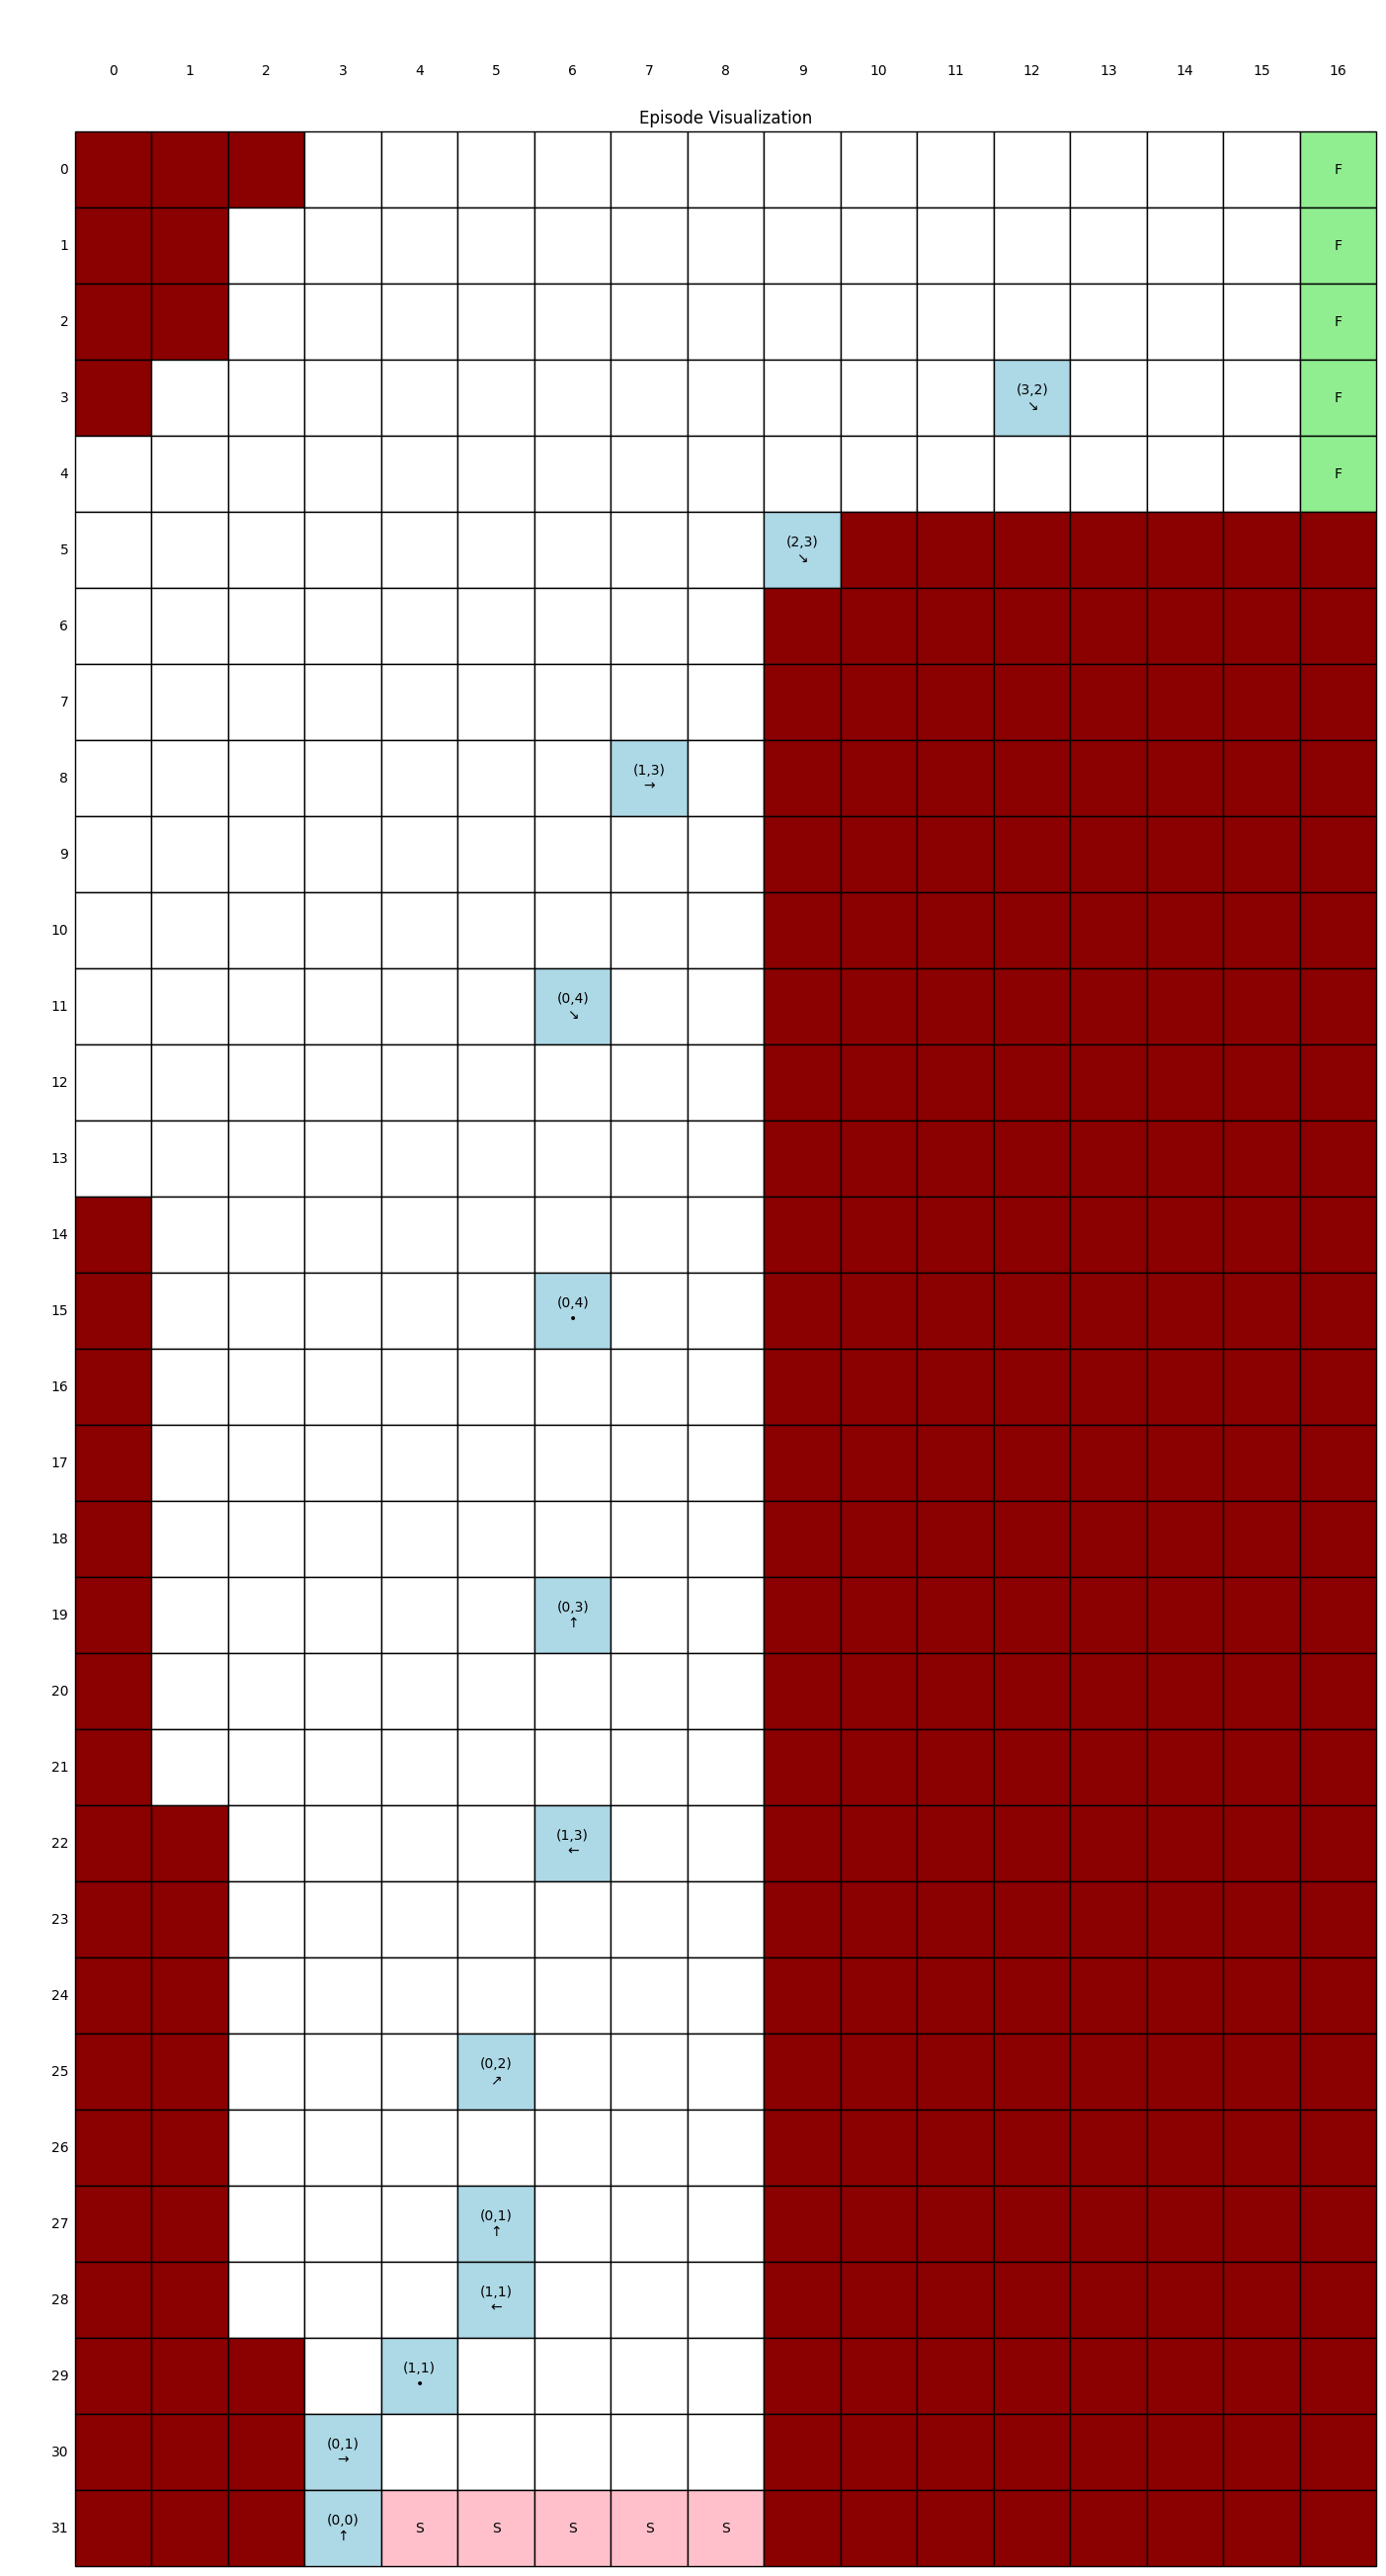

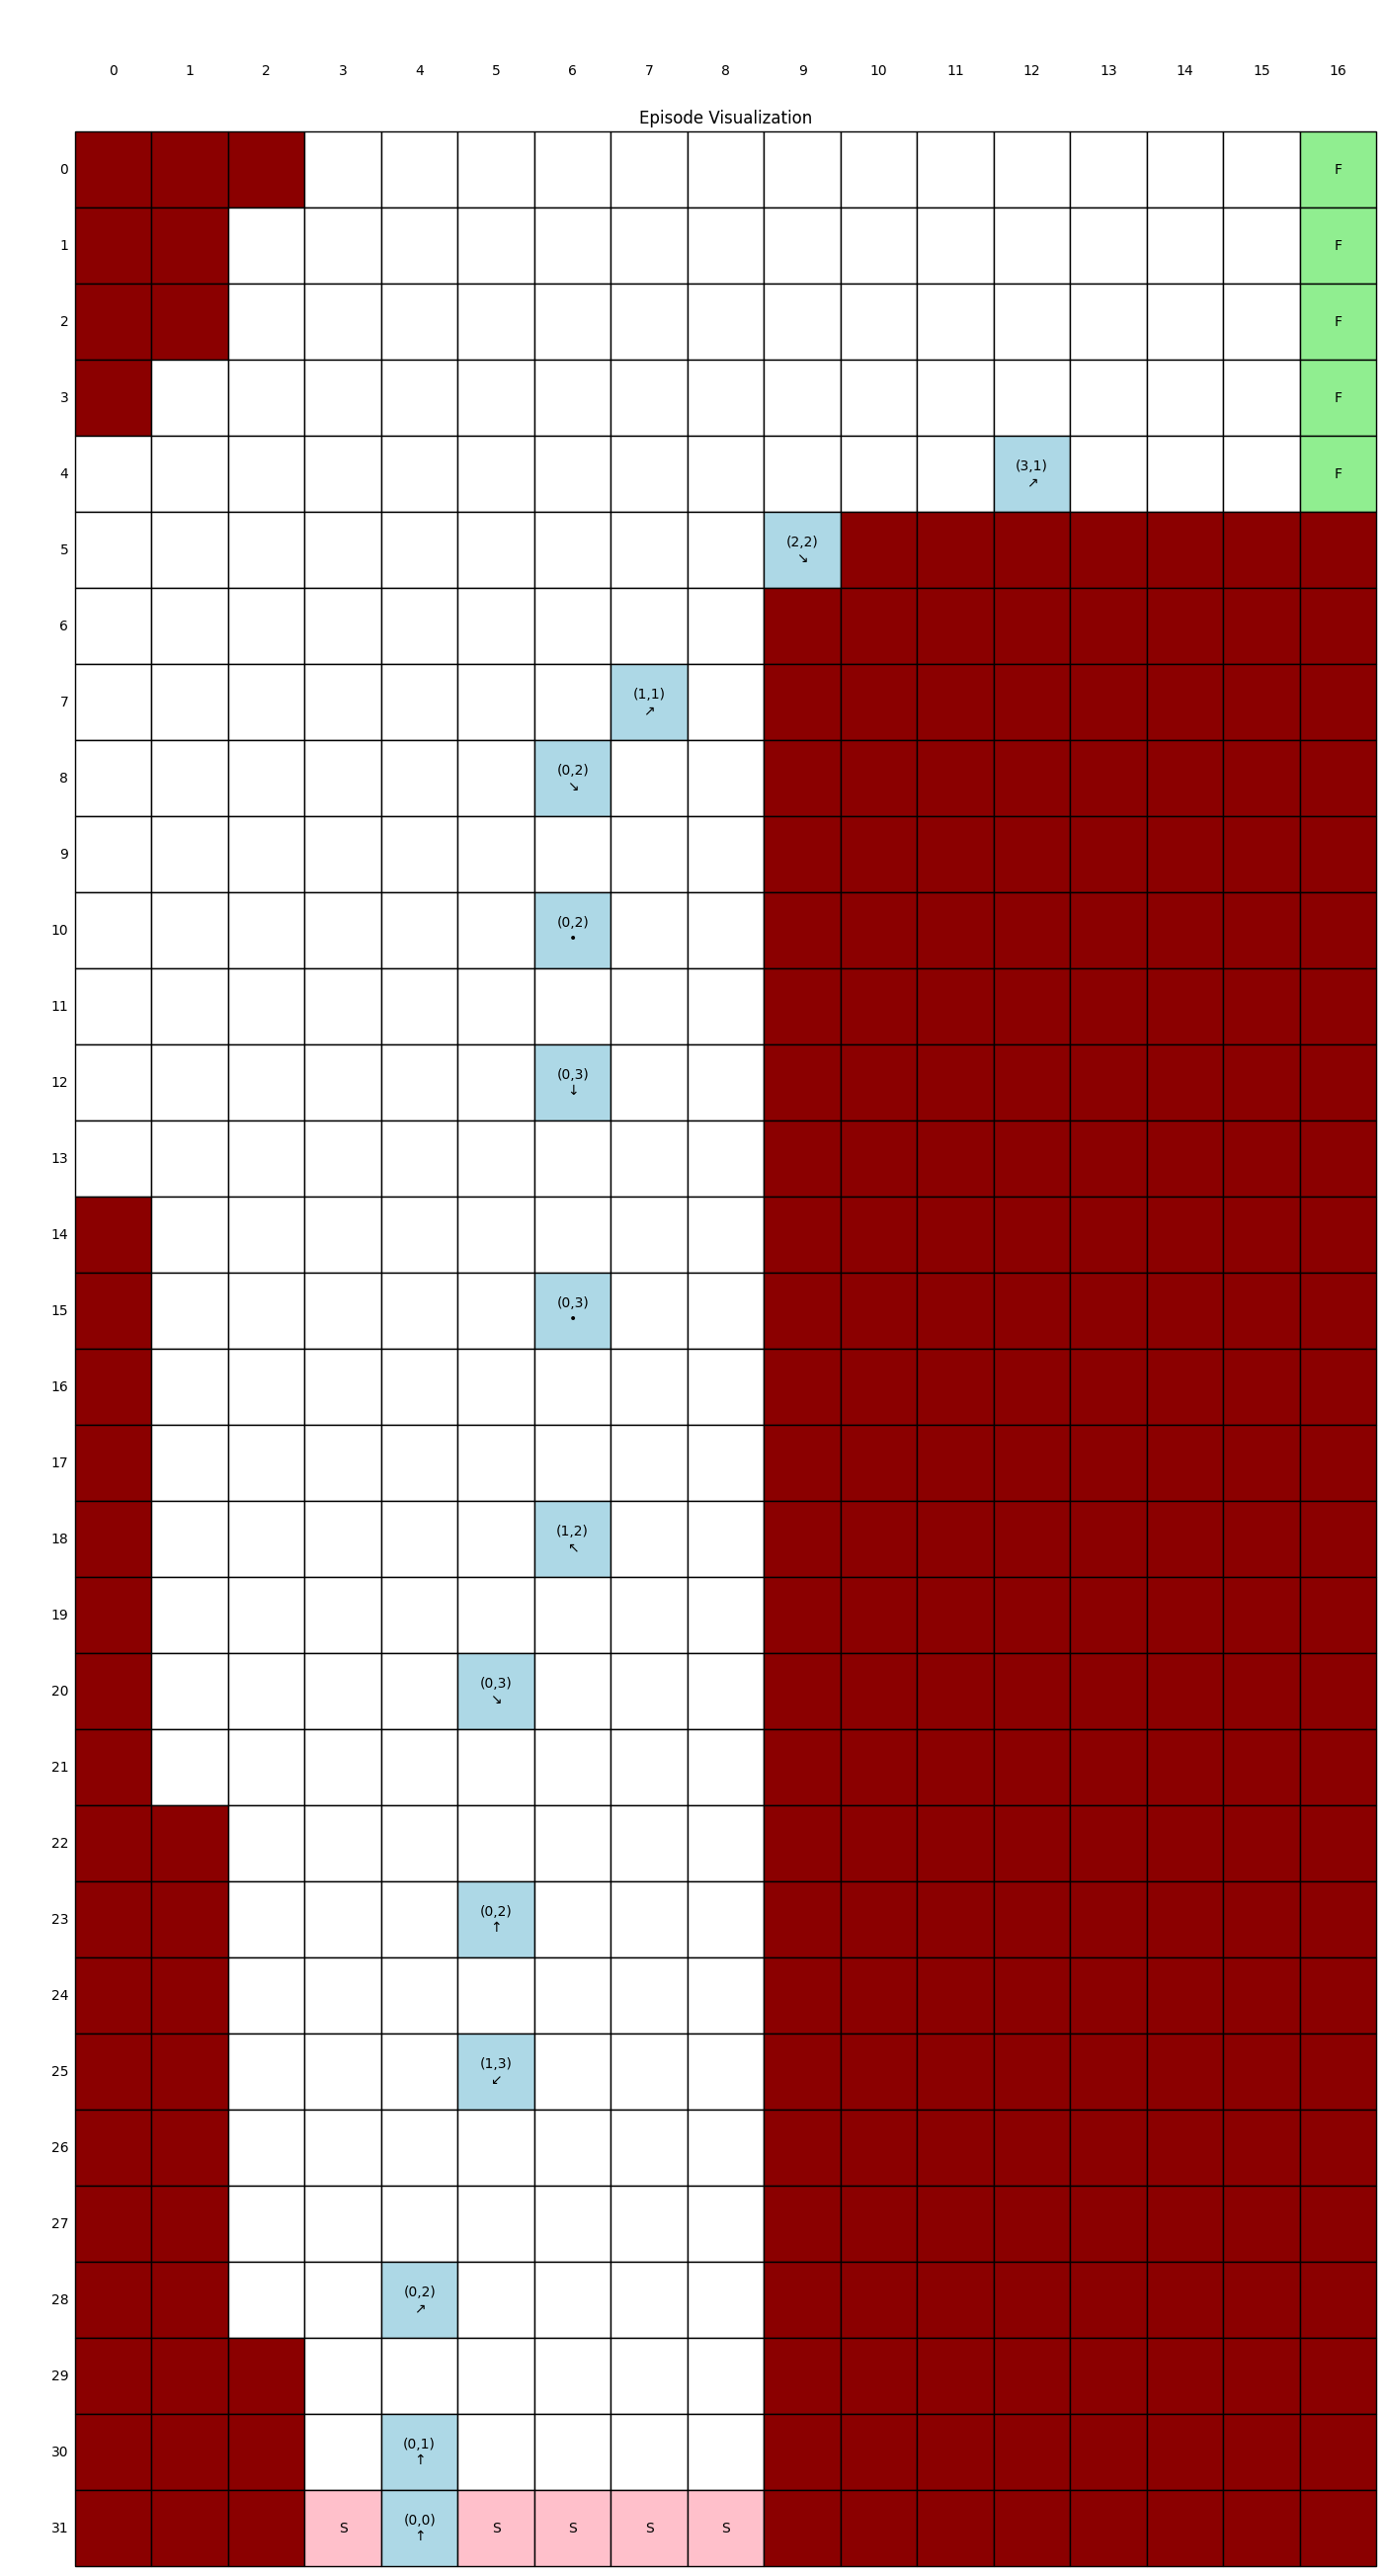

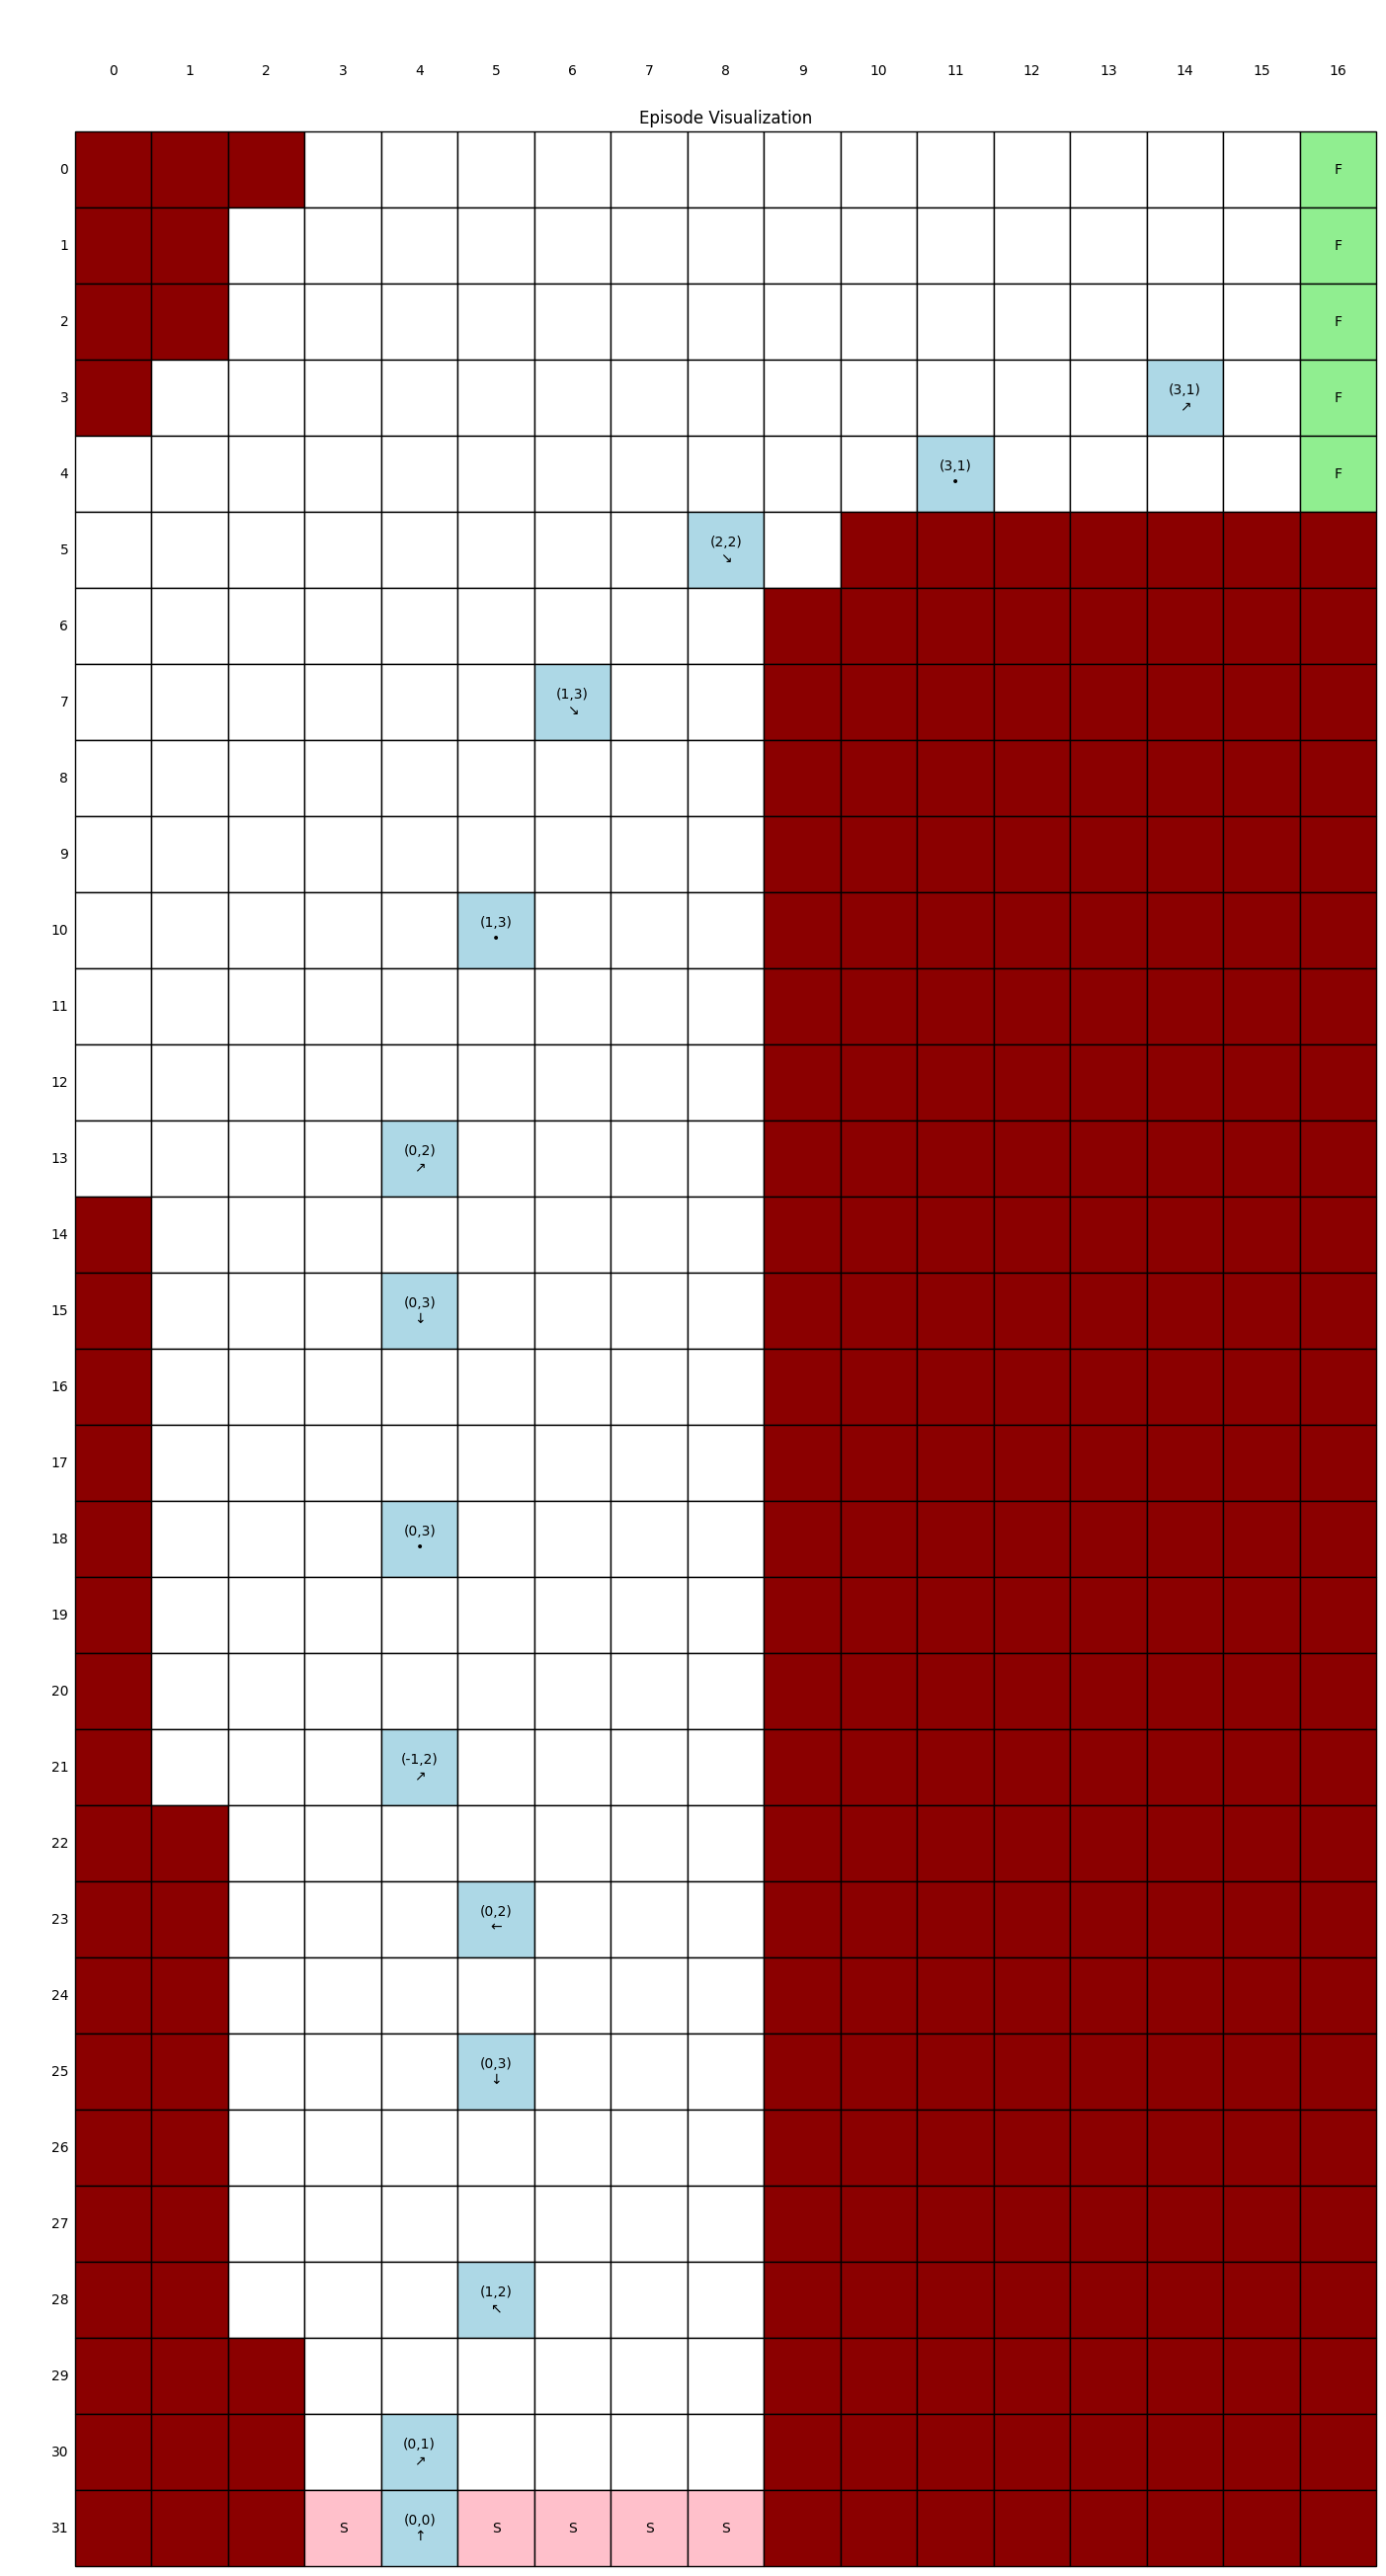

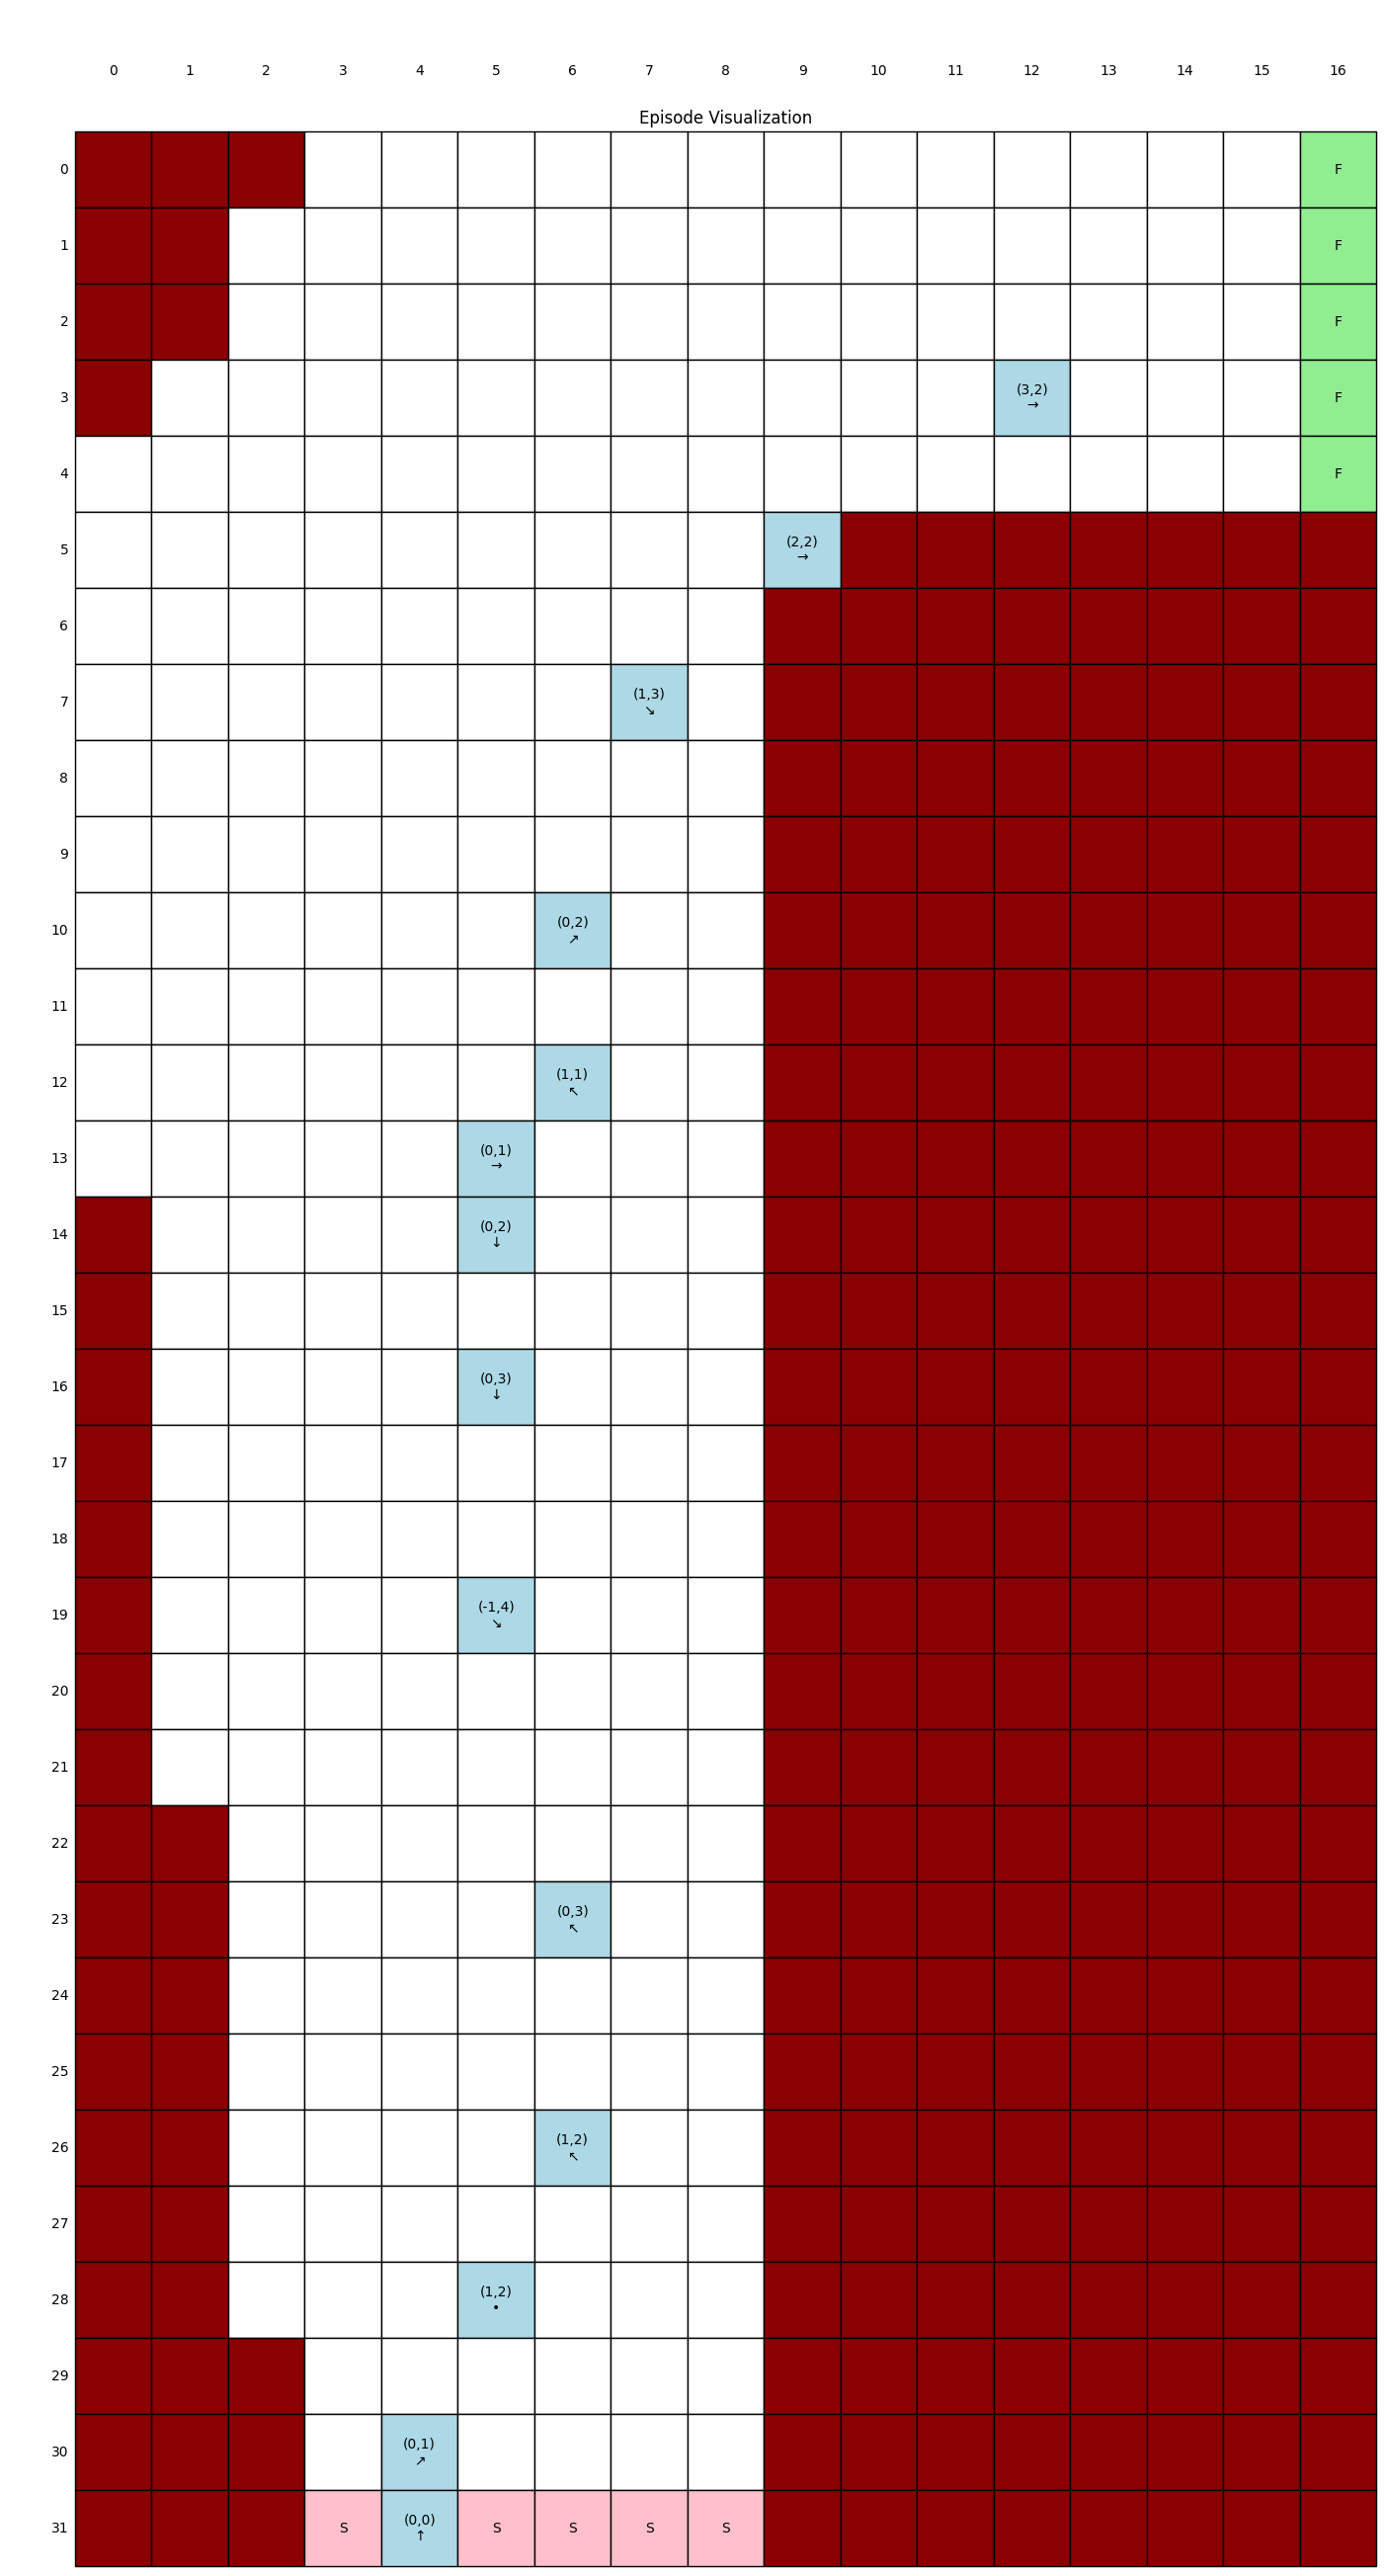

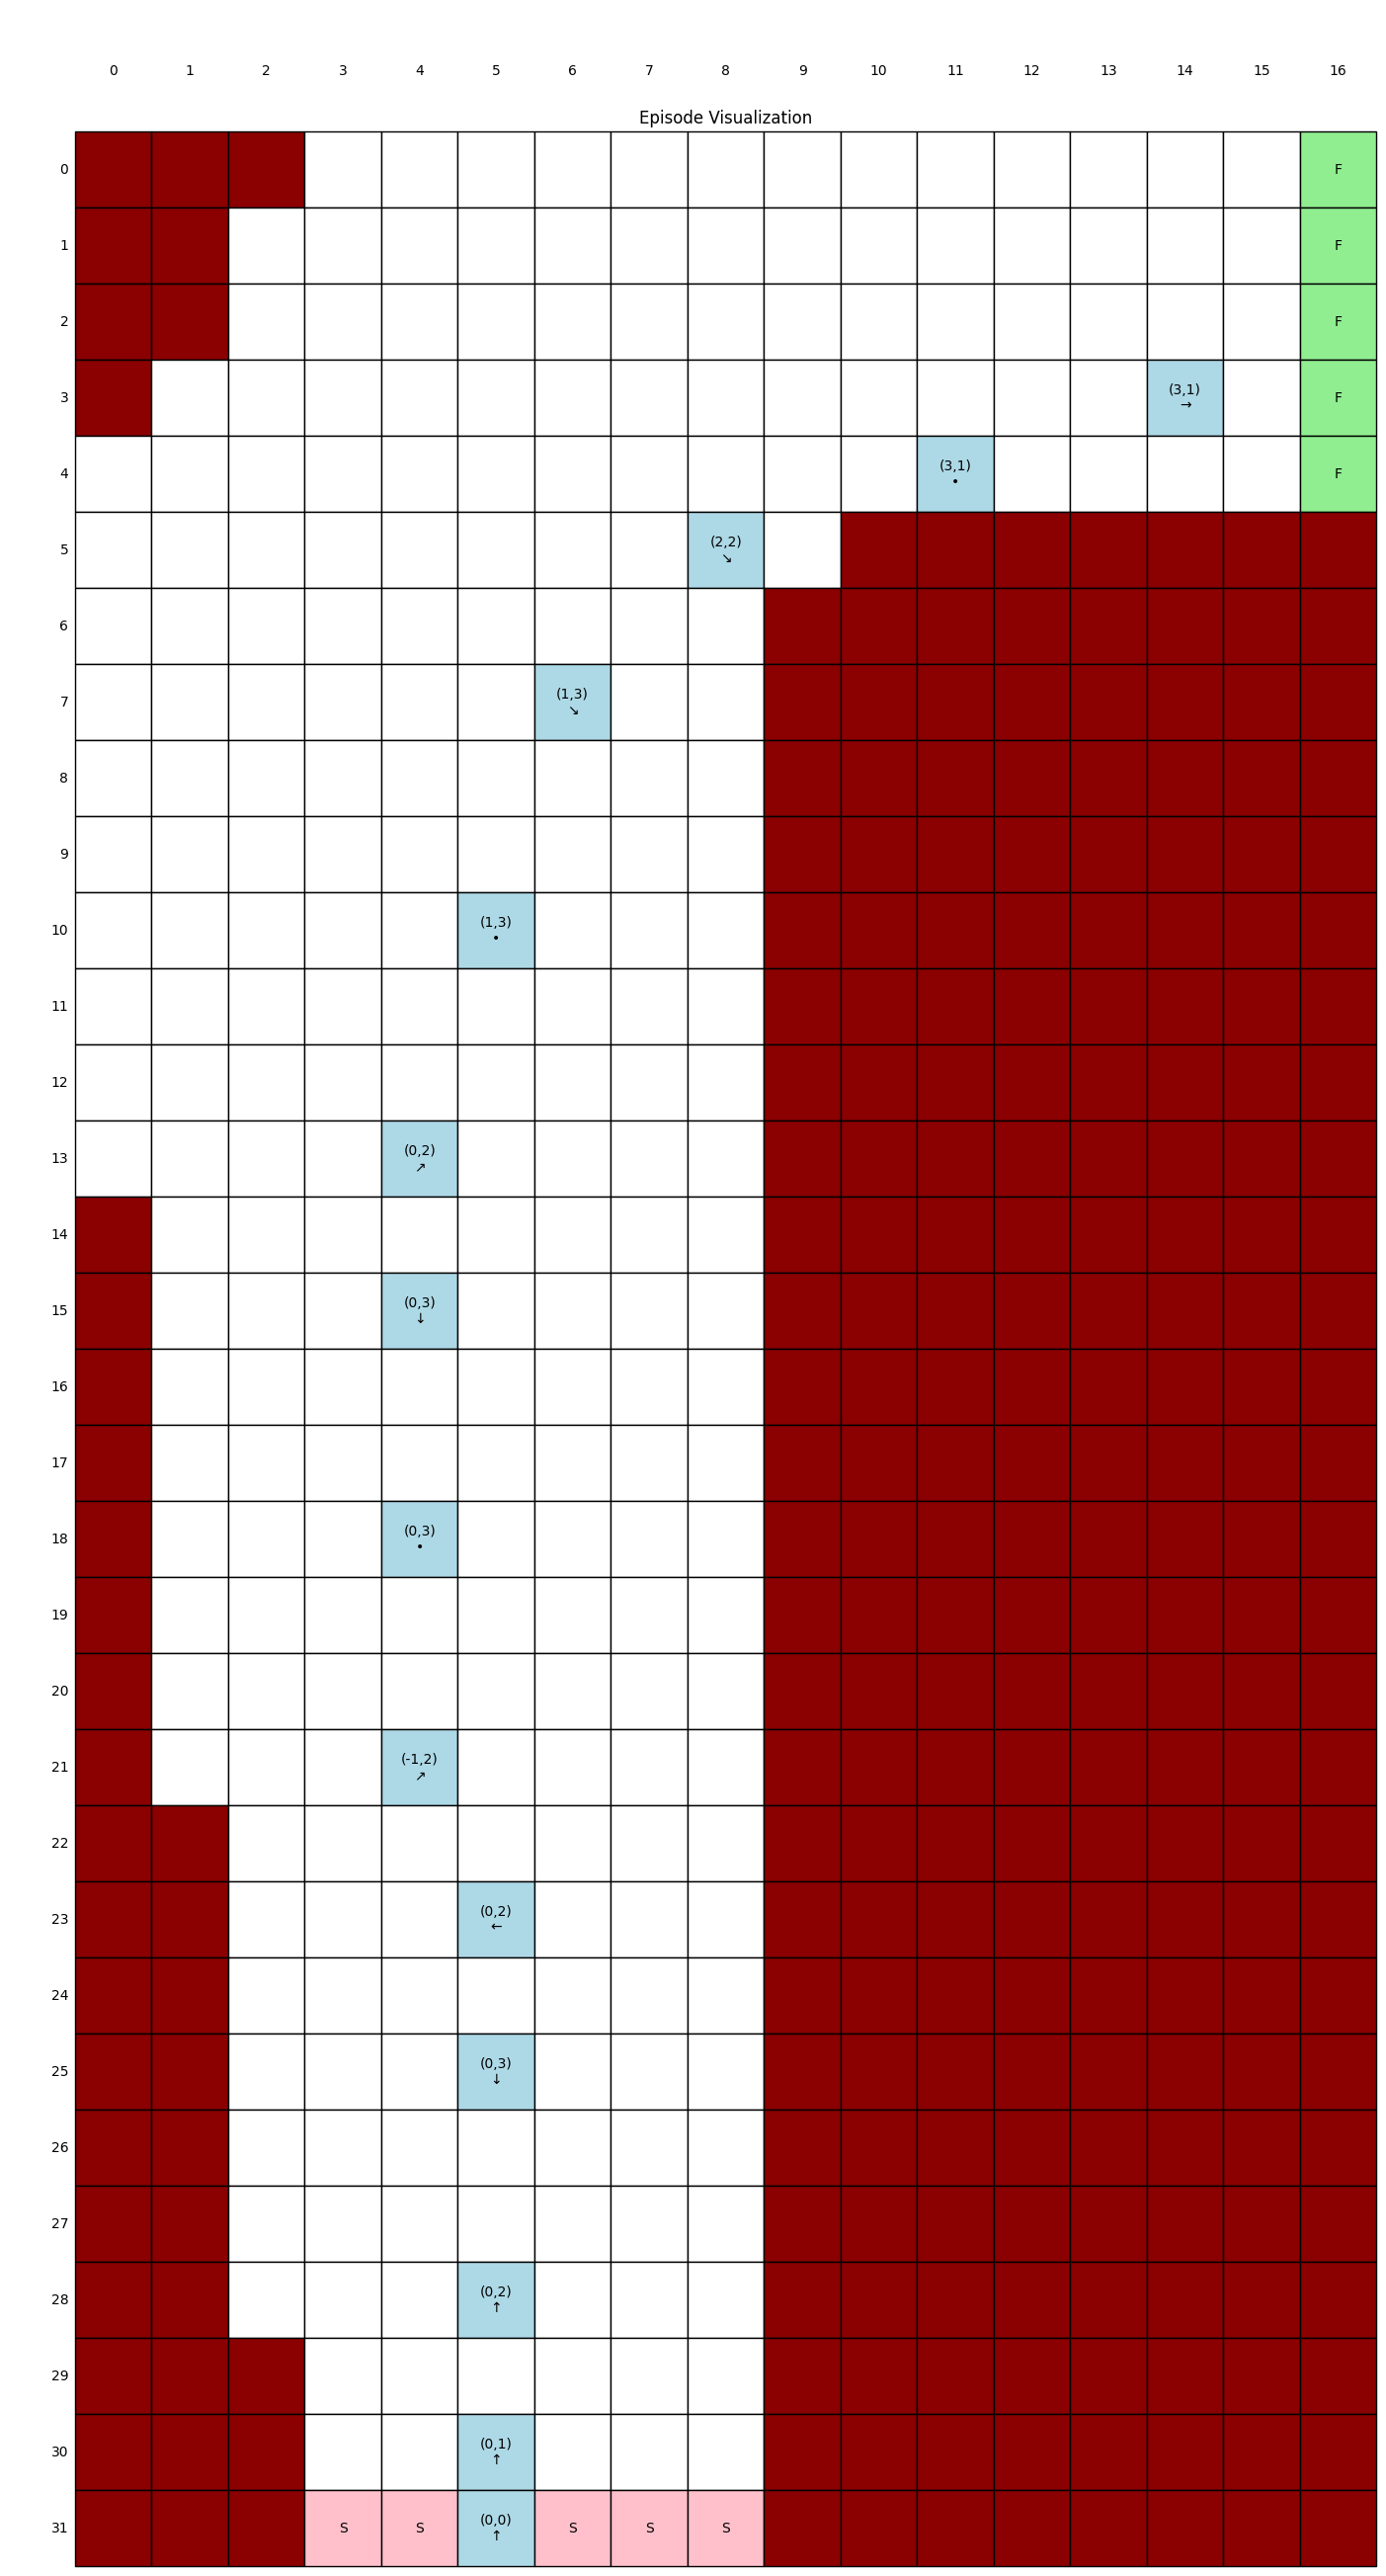

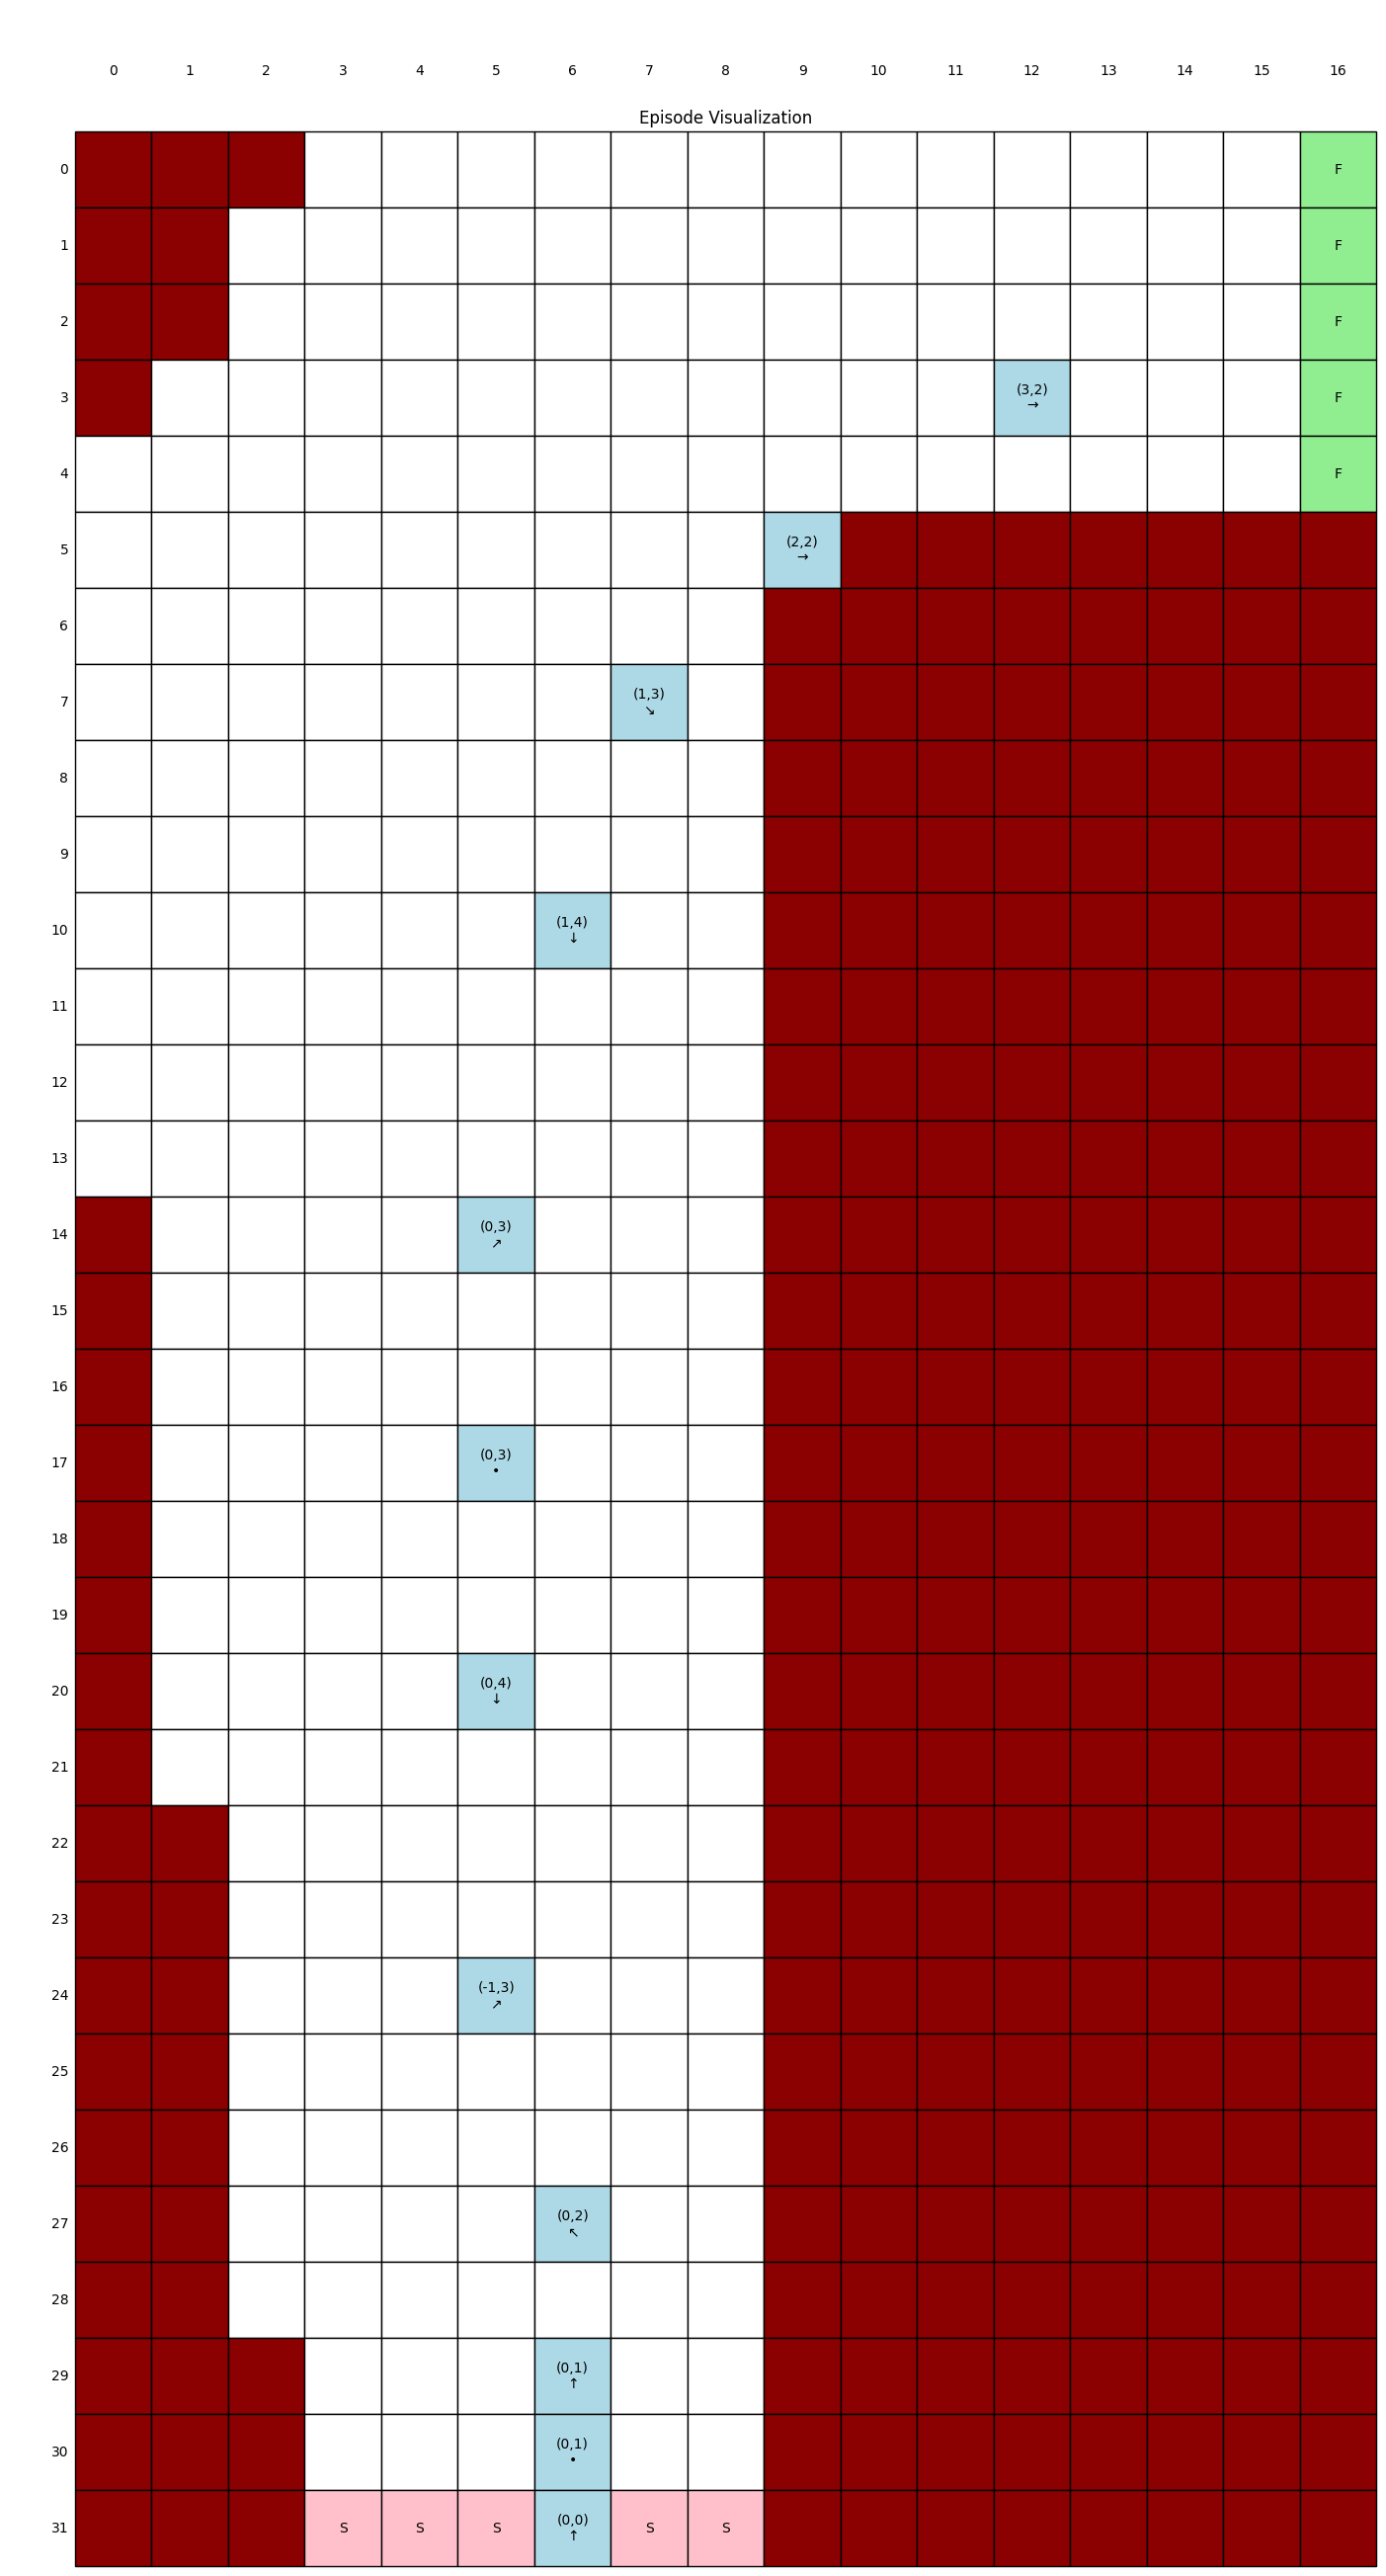

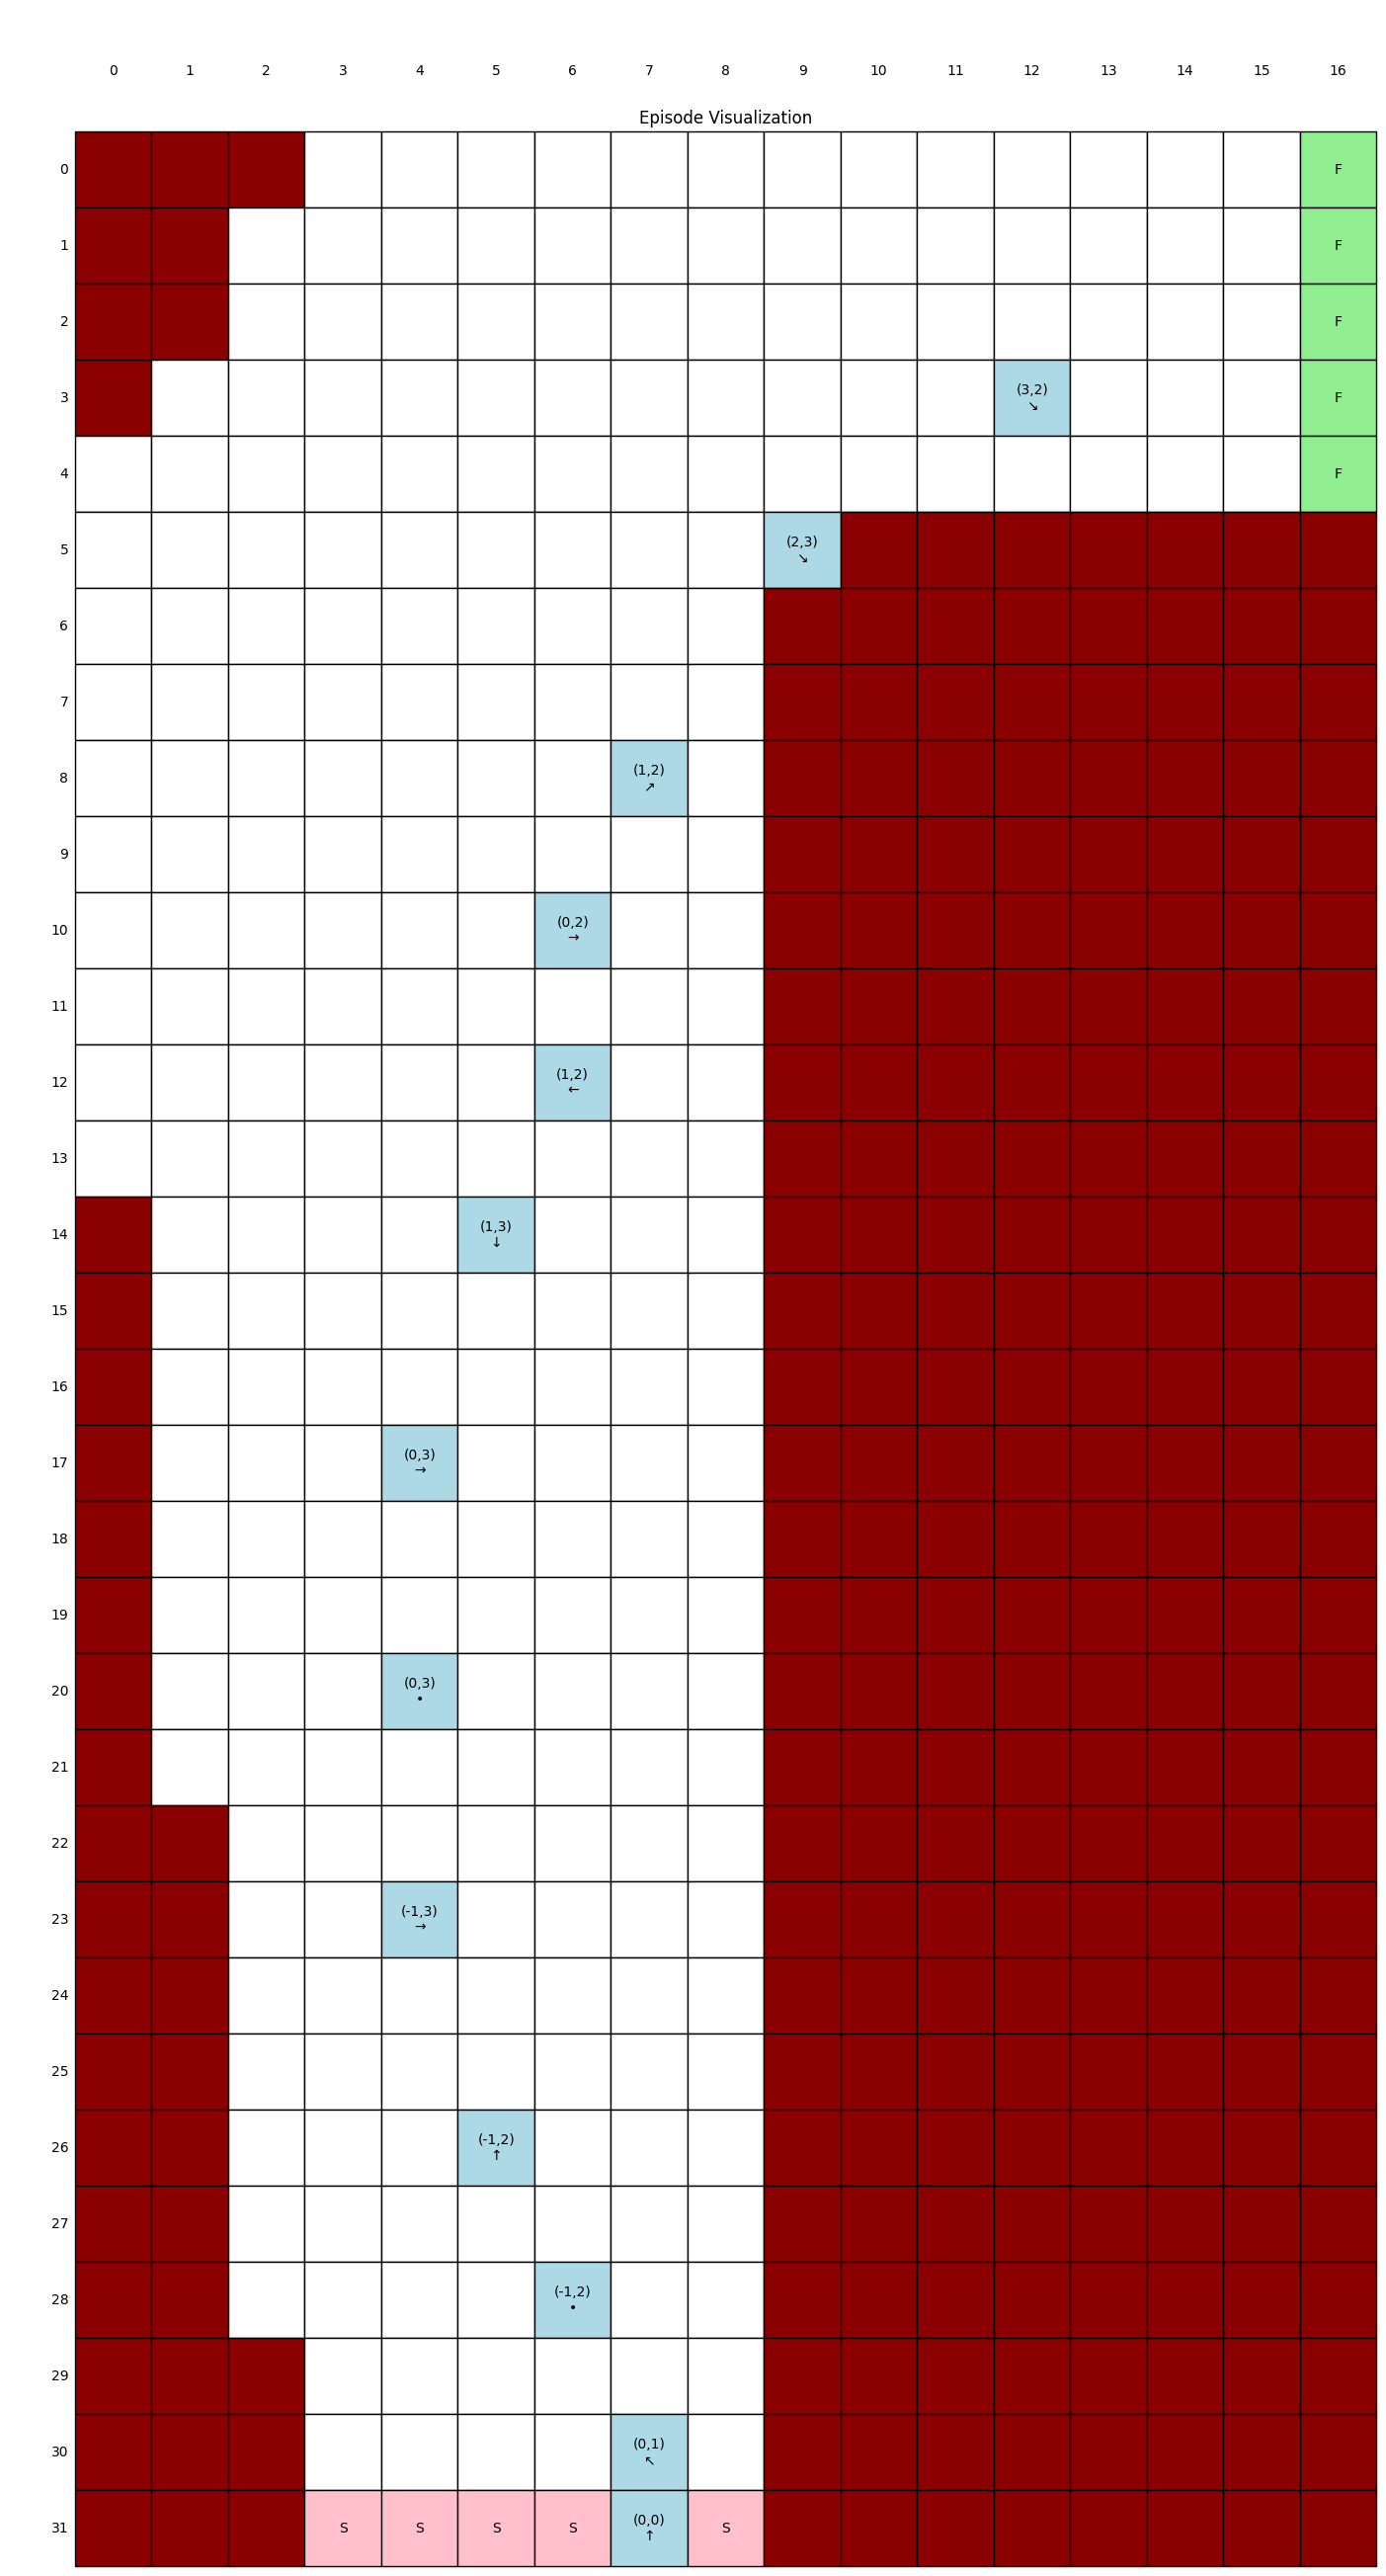

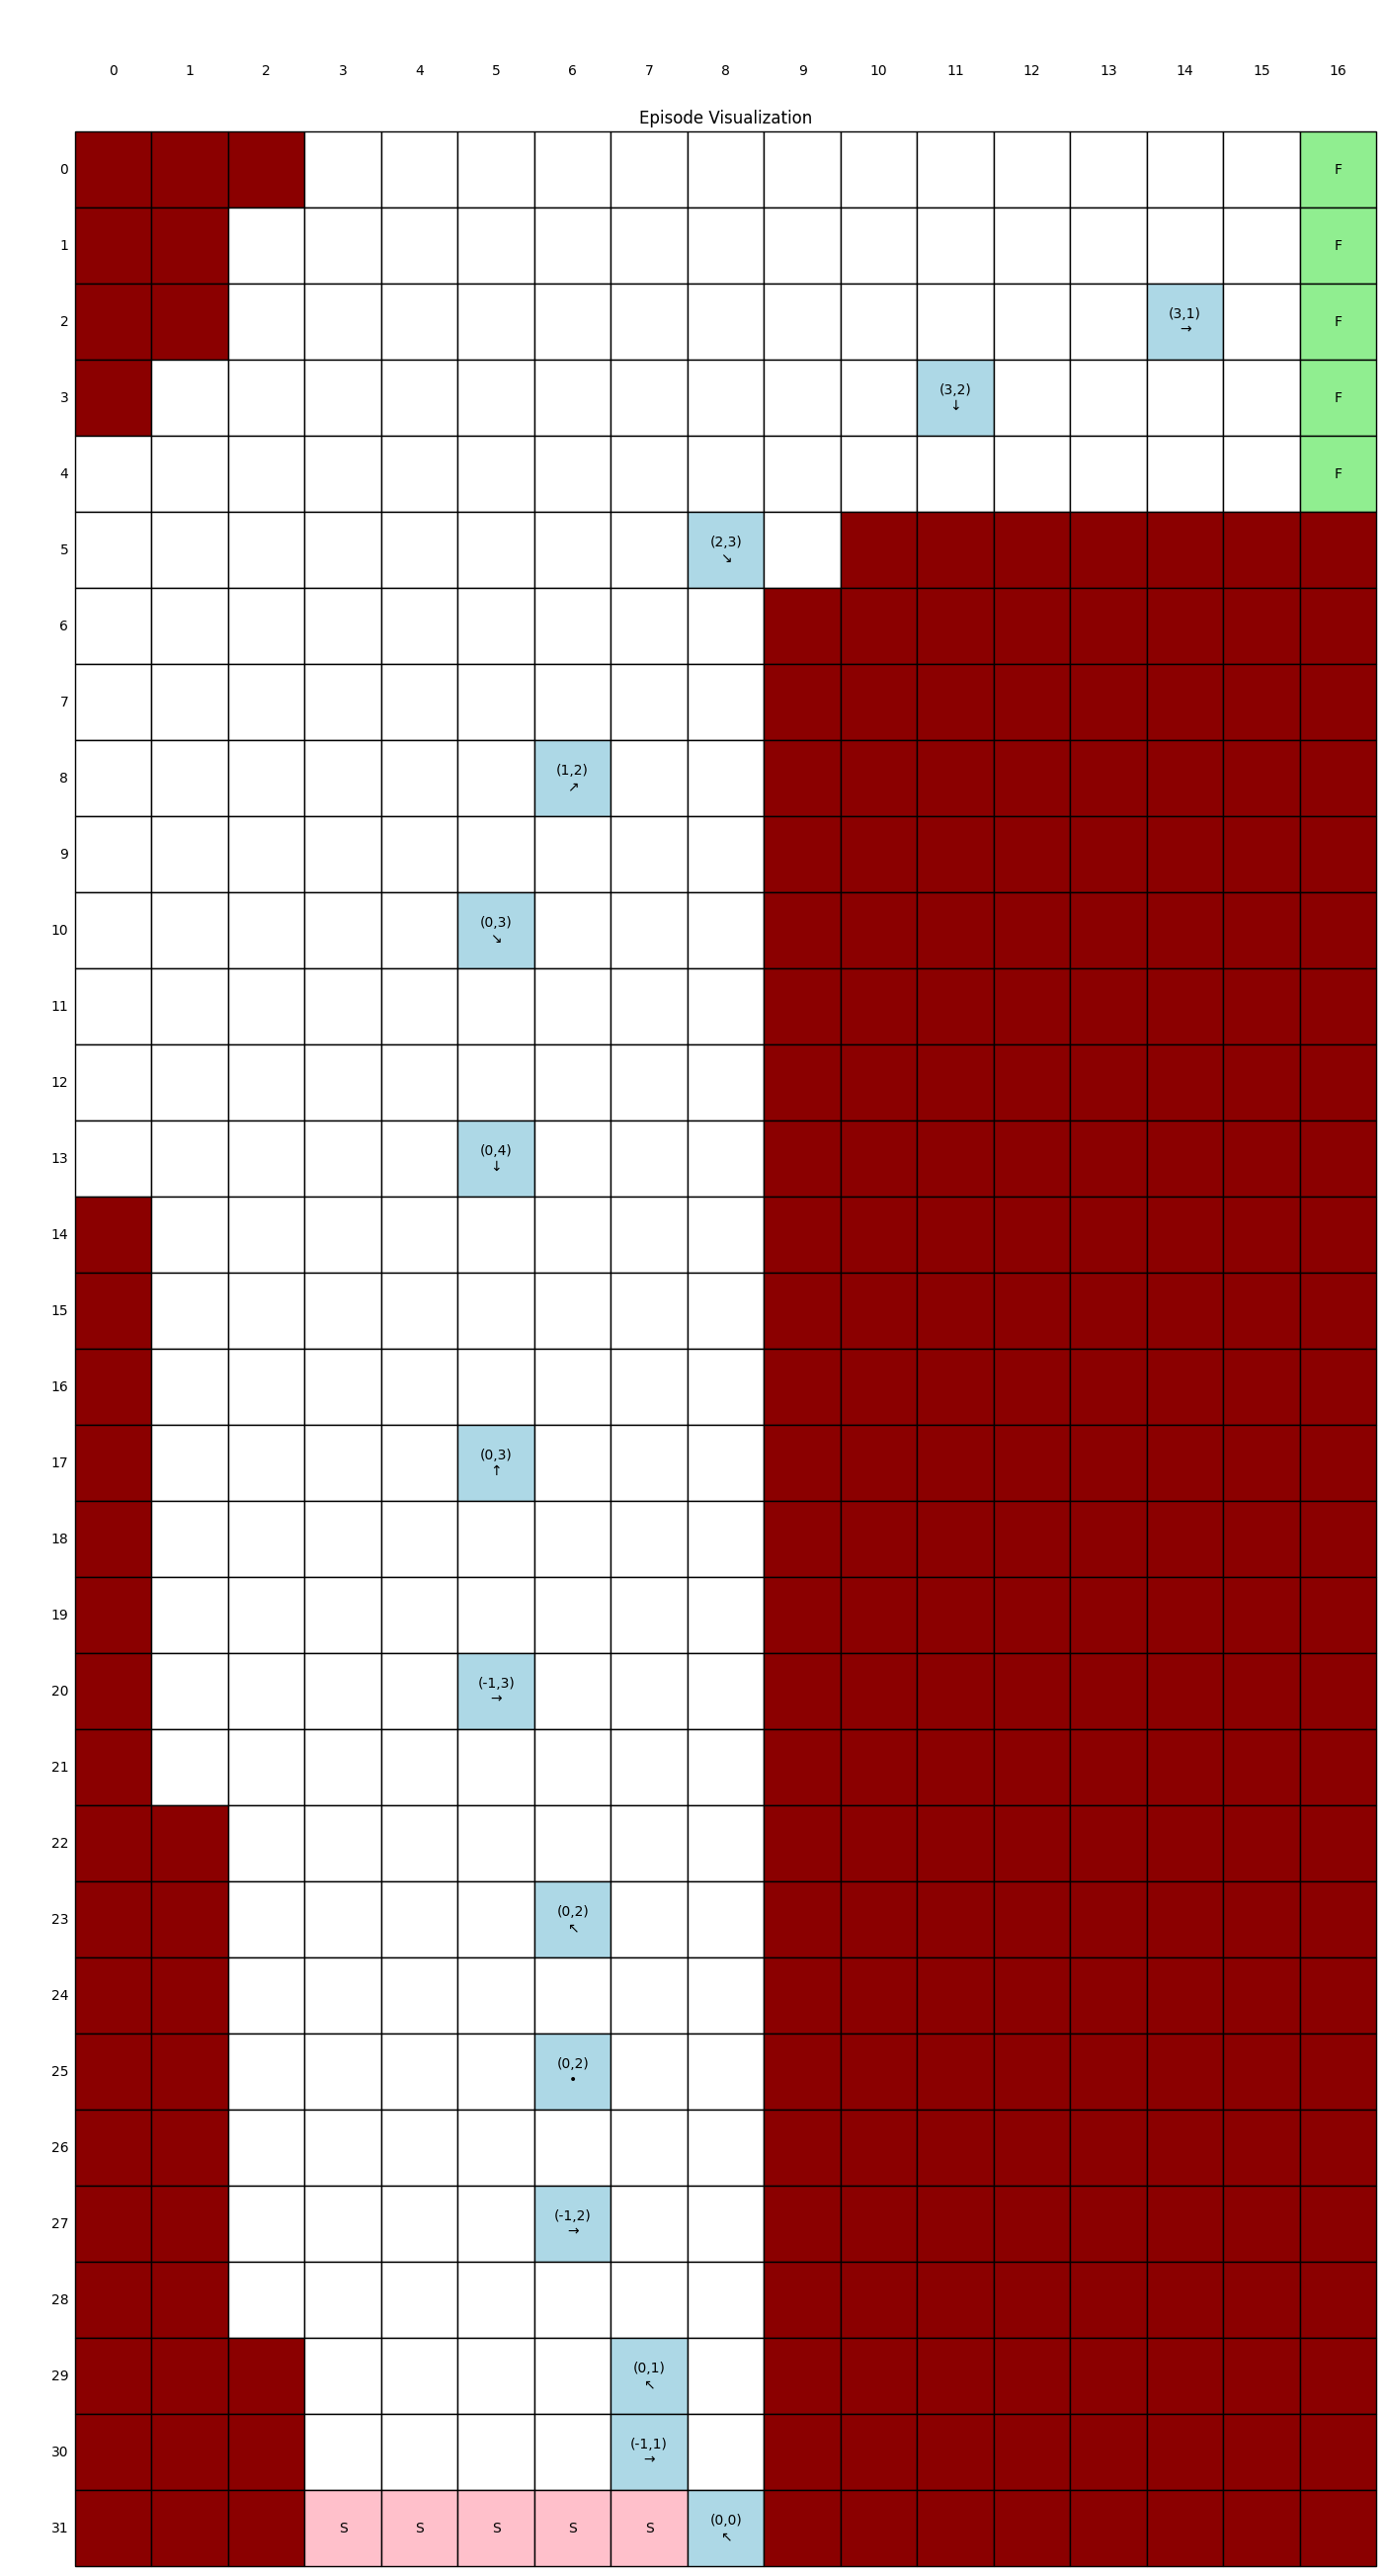

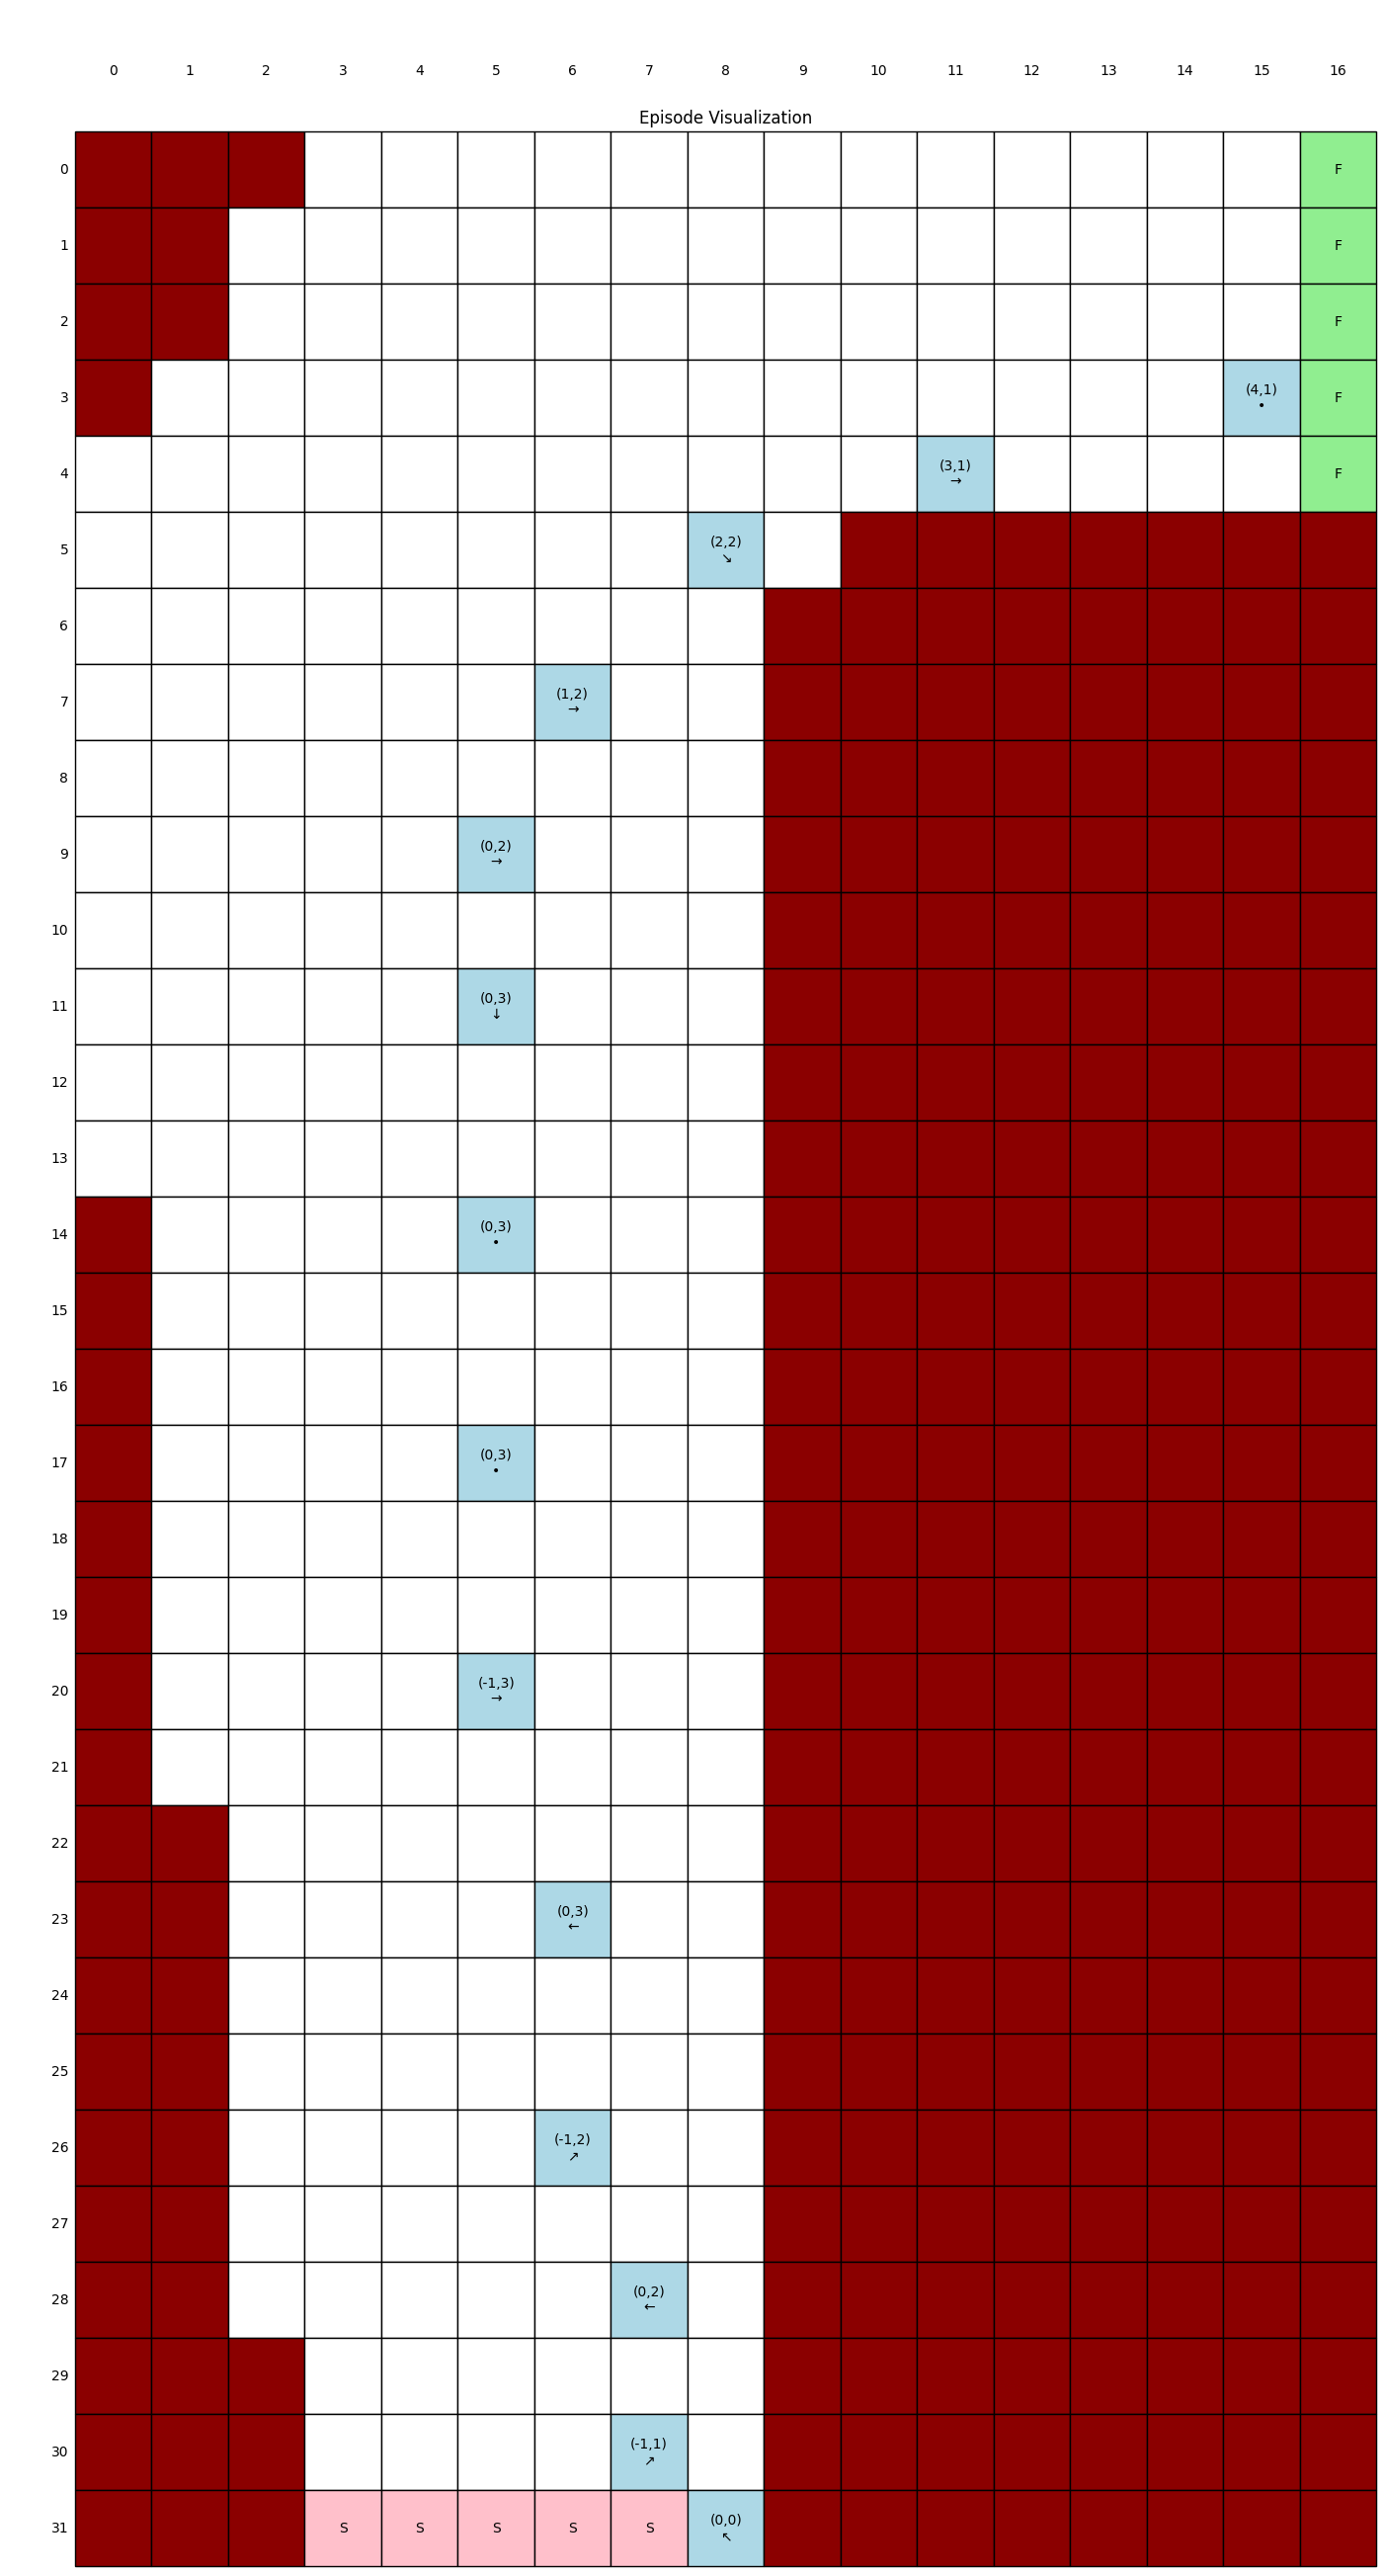

In [5]:
save_path = '/content/drive/MyDrive/RL/Project_3.npz'
grid = RaceGrid();
repeats = 20
start_states = [(31 , i, 0,0) for i in range(3,9)]
policies = []
episodes =np.empty((repeats,len(start_states)),dtype = object)
rewards = np.empty((repeats, len(start_states)), dtype = int)
for repeat in range(repeats):
  car = RaceCar(grid)
  print(f'run number = {repeat+1}')
  car.train(episode_counts = 2000,epsilon_start = 0.2, decay_rate = 0.02)
  for start_idx ,start_state in enumerate(start_states):
    episode_steps, reward = car.policy_per_start(start_state, print_count = True)
    episodes[repeat , start_idx ] = episode_steps
    rewards[repeat, start_idx] = reward
  policies.append(car.policy)
  np.savez(save_path, episodes= episodes, rewards=rewards, allow_pickle = True)
policies = np.array(policies)

max_reward= np.max(rewards, axis = 0)
print(max_reward)
for start_idx,_ in enumerate(start_states):
  for repeat in range(repeats):
    if rewards[repeat, start_idx] == max_reward[start_idx]:
      car.draw_episode(episodes[repeat,start_idx])




<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
باید توجه شود که در هیچ یک از ران های انجام شده، تابع سیاست همگرا نشده است. این میتواند به این خاطر باشد که حداکثر تعداد اپیزودهای تولید شده برای قطع پروسه آموزش کم است.
</font>
</p>


In [6]:
save_path1 = '/content/drive/MyDrive/RL/Project_3_policies.npz'

np.savez(save_path1, episodes= episodes, rewards=rewards, policies= policies, allow_pickle = True)

# <p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
بخش 4: یافتن سیاست بهینه
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
سیاست بهینه برای این مسئله، سیاستی در نظر گرفته می شود که بیشترین پاداش را در مجموع برای همه نقاط شروع دارد. این سیایت در <code>best_policy</code> ذخیره شده است. همچنین فایل نامپای تولید شده که شامل سیاست ها، پاداش ها و اپیزودهای نهایی تولید شده است نیز در کنار این کد ضمیمه شده است.
</font>
</p>

In [8]:
file = np.load(save_path1, allow_pickle = True)
loaded_episodes = file['episodes']
loaded_rewards = file['rewards']
loaded_policies = file['policies']

In [30]:
max_reward = -np.inf
for repeat in range(repeats):
  for start_idx, _ in enumerate(start_states):
    if sum(loaded_rewards[repeat,:]) > max_reward:
      best_policy = loaded_policies[repeat]
      max_reward = sum(loaded_rewards[repeat,:])


max_reward

-91